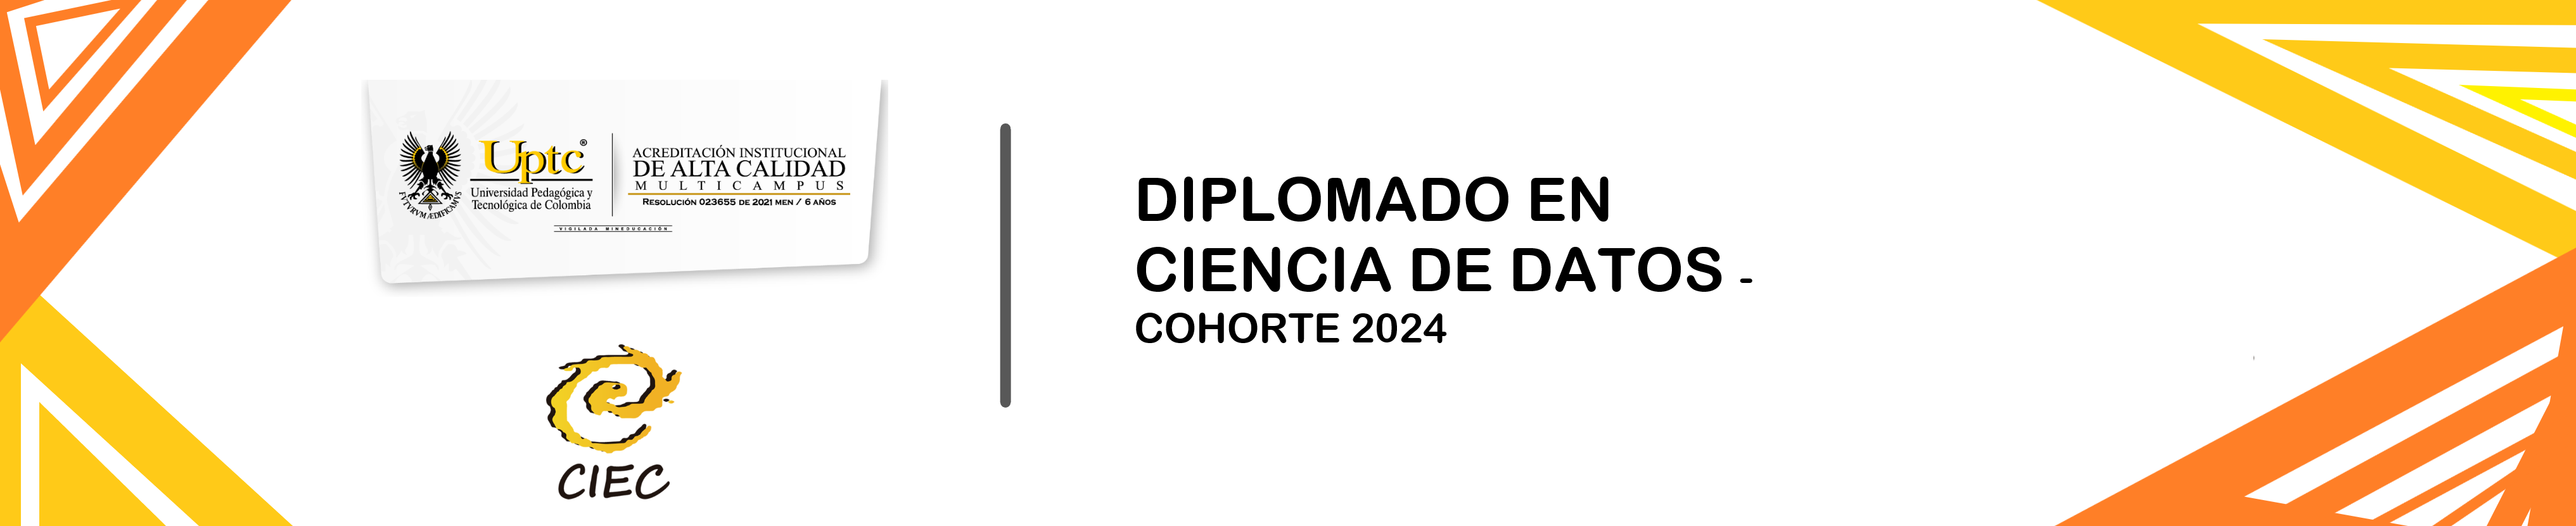

# **Curso: Fundamentos de Álgebra Lineal**

Bienvenido al curso de "*Álgebra Lineal*". Durante esta experiencia educativa, nos sumergiremos en los conceptos y técnicas fundamentales del álgebra lineal

Bienvenido al curso "*Álgebra Lineal*". Durante esta experiencia educativa, nos sumergiremos en los conceptos y técnicas fundamentales del álgebra Lineal utilizando el lenguaje Python. Este primer módulo, contenido en el presente notebook, tiene como objetivo principal proporcionar una sólida introducción a los sistemas de ecuaciones lineales, tipos de sistemas lineales, métodos de solución de sistemas lineales, espacios vectoriales y transformaciones lineales y el uso de la matriz inversa para resolver sistemas.


A lo largo de esta lección, exploraremos ejemplos que clarificarán los conceptos presentados, pero también brindarán una visión concreta del Álgebra Lineal introductoria. Este curso está diseñado para guiarlos de manera gradual a través de los aspectos esenciales del álgebra.

---

# **Contenidos:**

1. **Sistemas de ecuaciónes lineales**
  *   Sistemas de ecuaciónes lineales y el Álgebra Lineal
  *   Tipos de sistemas lineales
      * Sistemas compatibles determinados
      * Sistemas compatibles indeterminados
      * Sistemas incompatibles
2. **Espacios y transformaciones lineales**
  *   Espacios vectoriales
  *   Adición y sustracción de vectores
  *   Productos de vectores
  *   Matrices y transformaciones lineales
3. **Métodos de detección de solucionabilidad**
  *   Determinante de una matriz
  *   Independencia lineal
  *   Matriz Inversa
4. **Autovalores y autovectores**
  * Rango de una matriz
  * Bases propias


---

# Dependencias

In [ ]:
import numpy as np
import pandas as pd
#%run ".\graficadores.ipynb"
#%run "..\\Utilities\graficadores.ipynb"
#"2)-Algebra Lineal/Utilities/graficadores.ipynb"

In [ ]:
import matplotlib.pyplot as plt

#-------------------------------------------------------------------------------------------------------------------
#--------------------------------------- Graficador de ecuaciones lineales -----------------------------------------
#-------------------------------------------------------------------------------------------------------------------

def plot_lines(M):
    x_1 = np.linspace(-10,10,100)
    x_2_line_1 = (M[0,2] - M[0,0] * x_1) / M[0,1]
    x_2_line_2 = (M[1,2] - M[1,0] * x_1) / M[1,1]

    _, ax = plt.subplots(figsize=(10, 10))
    ax.plot(x_1, x_2_line_1, '-', linewidth=2, color='#0075ff',
        label=f'$x_2={-M[0,0]/M[0,1]:.2f}x_1 + {M[0,2]/M[0,1]:.2f}$')
    ax.plot(x_1, x_2_line_2, '-', linewidth=2, color='#ff7300',
        label=f'$x_2={-M[1,0]/M[1,1]:.2f}x_1 + {M[1,2]/M[1,1]:.2f}$')

    A = M[:, 0:-1]
    b = M[:, -1::].flatten()
    d = np.linalg.det(A)

    if d != 0:
        solution = np.linalg.solve(A,b)
        ax.plot(solution[0], solution[1], '-o', mfc='none',
            markersize=10, markeredgecolor='#ff0000', markeredgewidth=2)
        ax.text(solution[0]-0.25, solution[1]+0.75, f'$(${solution[0]:.0f}$,{solution[1]:.0f})$', fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-10, 10))
    ax.set_yticks(np.arange(-10, 10))

    plt.xlabel('$x_1$', size=14)
    plt.ylabel('$x_2$', size=14)
    plt.legend(loc='upper right', fontsize=14)
    plt.axis([-10, 10, -10, 10])

    plt.grid()
    plt.gca().set_aspect("equal")

    plt.show()

In [ ]:
#-------------------------------------------------------------------------------------------------------------------
#--------------------------------------- Graficador de ecuaciones lineales -----------------------------------------
#-------------------------------------------------------------------------------------------------------------------

def graficar_soluciones(x, y, A, b,limite, titulo):
  plt.figure()

  for ecuacion in ecuaciones:
    plt.plot(x, ecuacion)

  try:
    solucion = np.linalg.solve(A,b)
    plt.plot(solucion[0], solucion[1], '-o', mfc='none',markersize=10, markeredgecolor='#ff0000', markeredgewidth=2)
  except np.linalg.LinAlgError as err:
    print(err)

  plt.xlim(-(limite + 2), (limite + 2))
  plt.ylim(-(limite + 2), (limite + 2))
  plt.xlabel('$x$', size=14)
  plt.ylabel('$y$', size=14)
  plt.title(titulo)
  plt.grid()
  plt.show()

In [ ]:
import matplotlib.pyplot as plt

#-------------------------------------------------------------------------------------------------------------------
#----------------------------------------- Graficador de simple de vectores ----------------------------------------
#-------------------------------------------------------------------------------------------------------------------

def plot_vectors(list_v, list_label, list_color,limit1,limit2):
    _, ax = plt.subplots(figsize=(6, 6))
    ax.tick_params(axis='x', labelsize=6)
    ax.tick_params(axis='y', labelsize=6)
    ax.set_xticks(np.arange(-limit1, limit2))
    ax.set_yticks(np.arange(-limit2, limit2))

    plt.xlim(-limit1, limit1)
    plt.ylim(-limit2,limit2)

    for i, v in enumerate(list_v):
        sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v)])
        plt.quiver(v[0], v[1], color=list_color[i], angles='xy', scale_units='xy', scale=1)
        ax.text(v[0]-0.2+sgn[0], v[1]-0.2+sgn[1], list_label[i], fontsize=14, color=list_color[i])

    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5, alpha = 0.5)
    plt.gca().set_aspect("equal")
    plt.title('Vectores en 2D')
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------------------------------------------------------------------------------
#-------------------------------------- Graficador de vectores con propiedades -------------------------------------
#-------------------------------------------------------------------------------------------------------------------

def plot_vector_propiedades(vector,limit1,limit2):
  # Cálculo de la magnitud
  magnitud = np.linalg.norm(vector)
  # Cálculo de la dirección (ángulo en radianes con respecto al eje x)
  direccion = np.arctan2(vector[1], vector[0])

  # Plot del vector
  plt.figure(figsize=(6, 6))
  plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector')

  # Configuración del gráfico
  plt.xlim(limit1,limit2)
  plt.ylim(limit1,limit2)
  plt.axhline(0, color='black',linewidth=0.5)
  plt.axvline(0, color='black',linewidth=0.5)
  plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5, alpha = 0.5)

  # Etiquetas y leyenda
  plt.text(vector[0] + 0.1, vector[1] + 0.1, f'Magnitud: {magnitud:.2f}', fontsize=10)
  plt.text(0.5, -0.5, f'Dirección: {direccion:.2f} radianes', fontsize=10)
  plt.title('Vector en 2D')
  plt.legend()
  plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------------------------------------------------------------------------------
#------------------------------------------ Graficador de productos punto ------------------------------------------
#-------------------------------------------------------------------------------------------------------------------

def visualizar_dot(v, w):
    # Cálculo del producto punto
    producto_punto = np.dot(v, w)

    # Proyección de w en la dirección de v
    proyeccion_w_en_v = (producto_punto / np.linalg.norm(v)**2) * v

    # Visualización de los vectores
    plt.figure(figsize=(6, 6))
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', label='v')
    plt.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='r', label='w')
    plt.quiver(0, 0, proyeccion_w_en_v[0], proyeccion_w_en_v[1], angles='xy', scale_units='xy', scale=1, color='g', label='Proyección de w en v')

    # Configuración del gráfico
    max_value = max(np.max(v), np.max(w), np.max(proyeccion_w_en_v))
    min_value = min(np.min(v), np.min(w), np.min(proyeccion_w_en_v))

    plt.xlim(min_value - 1, max_value + 1)
    plt.ylim(min_value - 1, max_value + 1)
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Etiquetas y leyenda
    plt.text(v[0] + 0.1, v[1] + 0.1, 'v', fontsize=10)
    plt.text(w[0] + 0.1, w[1] + 0.1, 'w', fontsize=10)
    plt.text(proyeccion_w_en_v[0] + 0.1, proyeccion_w_en_v[1] + 0.1, 'Proyección', fontsize=10, color='g')
    plt.title('Vectores en 2D, Proyección de w en v y Producto Punto')
    plt.legend()

    # Mostrar el ángulo entre los vectores
    plt.annotate("", xy=(w[0], w[1]), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
    plt.annotate("", xy=(v[0], v[1]), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
    plt.annotate(r'$\theta$', xy=(0.5, 0.8), fontsize=12)

    plt.show()

    # Cálculo del ángulo en radianes
    magnitud_v = np.linalg.norm(v)
    magnitud_w = np.linalg.norm(w)
    cos_theta = producto_punto / (magnitud_v * magnitud_w)
    theta_radianes = np.arccos(cos_theta)

    print(f'Producto Punto: {producto_punto}')
    print(f'Ángulo entre los vectores en radianes: {theta_radianes:.2f}')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#-------------------------------------------------------------------------------------------------------------------
#------------------------------------------ Graficador de productos cruz -------------------------------------------
#-------------------------------------------------------------------------------------------------------------------

def visualizar_producto_cruz(v, w):
    # Cálculo del producto cruz
    producto_cruz = np.cross(v, w)

    # Configuración del gráfico
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(0, 0, 0, v[0], v[1], v[2], color='b', label='v')
    ax.quiver(0, 0, 0, w[0], w[1], w[2], color='r', label='w')
    ax.quiver(0, 0, 0, producto_cruz[0], producto_cruz[1], producto_cruz[2], color='g', label='v x w')

    # Configuración de límites
    max_value = max(np.max(v), np.max(w), np.max(producto_cruz))
    min_value = min(np.min(v), np.min(w), np.min(producto_cruz))
    ax.set_xlim([min_value - 1, max_value + 1])
    ax.set_ylim([min_value - 1, max_value + 1])
    ax.set_zlim([min_value - 1, max_value + 1])

    # Etiquetas y leyenda
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.text(v[0] + 0.1, v[1] + 0.1, v[2] + 0.1, 'v', fontsize=10)
    ax.text(w[0] + 0.1, w[1] + 0.1, w[2] + 0.1, 'w', fontsize=10)
    ax.text(producto_cruz[0] + 0.1, producto_cruz[1] + 0.1, producto_cruz[2] + 0.1, 'v x w', fontsize=10, color='g')
    ax.set_title('Producto Cruz en el Espacio Tridimensional')
    ax.legend()

    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------------------------------------------------------------------------------
#-------------------------------------- Graficador de transformación lineal ----------------------------------------
#-------------------------------------------------------------------------------------------------------------------

def transformacion_de_espacio(A):
    # Generar puntos en el círculo unitario
    t = np.linspace(0, 2*np.pi, 100)
    circulo_unitario = np.array([np.cos(t), np.sin(t)])

    # Aplicar la transformación de la matriz A
    circulo_transformado = np.dot(A, circulo_unitario)

    # Configurar el gráfico
    plt.figure(figsize=(6, 6))
    plt.plot(circulo_unitario[0], circulo_unitario[1], label='Círculo Unitario', color='blue')
    plt.plot(circulo_transformado[0], circulo_transformado[1], label='Círculo Transformado', color='orange')

    # Configurar detalles del gráfico
    plt.title('Transformación del Círculo Unitario por la Matriz A')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.legend()
    plt.axis('equal')  # Hacer que los ejes tengan la misma escala

    # Mostrar el resultado
    plt.show()

# **1. Sistemas de ecuaciones lineales**

### 1.1. Sistemas de ecuaciónes lineales y el Álgebra Lineal


---
El Álgebra Lineal y las ecuaciones lineales


---





Un sistema de ecuaciones lineales (o sistema lineal) corresponde a una colección de una o más ecuaciones lineales, las cuales son expresiones matemáticas que involucran variables elevadas a la primera potencia, multiplicadas por coeficientes constantes, y sumadas o restadas entre si, en donde el objetivo es encontrar los valores de las variables que satisfacen la igualdad. Por ejemplo, un sistema de ecuaciones lineales es el siguiente:


\begin{cases} 2 x_1 + -1x_2 = 3, \\ 4x_1 + 2x_2 = 10 \end{cases}


Un sistema de ecuaciones lineales puede ser representado de manera algebráica mediante la selección y organización de los coeficientes constantes del sistema en una matriz o arreglo de vectores, mientras que las variables y resultados de la igualdad han de ser dispuestos en forma de vectores columna. De esta manera, el sistema de ecuaciones se recupera mediante la multiplicación entre la matriz de coeficientes y el vector de incógnitas de la forma `A x = b`, en donde:

$
A x =b \rightarrow\begin{bmatrix}
  2 & -1 \\
  4 & 2
\end{bmatrix}  \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 3 \\ 10 \end{bmatrix}
$


En el ámbito de las matemáticas aplicadas, el álgebra lineal es una rama que se ocupa del estudio y análisis de espacios vectoriales y transformaciones lineales entre ellos. Utiliza conceptos como vectores, matrices y sistemas de ecuaciones lineales para describir y analizar relaciones lineales entre distintas variables. El álgebra lineal tiene aplicaciones extensas en diversas disciplinas, como la física, la ingeniería, la informática, la estadística y muchas áreas de la ciencia y la tecnología. Su importancia radica en su capacidad para modelar y resolver problemas que involucran relaciones lineales y transformaciones en múltiples dimensiones.

En el sistema de ecuaciones lineales anterior, exísten dos incógnitas $x_1$ y  $x_2$ en donde nuestro objetivo será conocer sus valores, los cuals hacen que las igualdades que conforman al sistema lineal sean verdaderas simultáneamente. No obstante debemos tener en claro los siguientes conceptos:

* **Vector**:
Un vector es una entidad matemática que tiene magnitud y dirección. Puede representarse como una serie ordenada de números, también conocidos como componentes o elementos. Los vectores pueden ser bidimensionales (en el plano), tridimensionales (en el espacio), o tener un número arbitrario de dimensiones. U

* **Matriz**:Una matriz es una colección rectangular de números, símbolos o expresiones dispuestos en filas y columnas. Cada elemento de una matriz se llama entrada o elemento de la matriz. Las matrices se utilizan comúnmente para representar datos en forma tabular o para describir transformaciones lineales. Una matriz `m x n` tiene `x` filas y `n` columnas.





In [ ]:
# Representación de un sistema lineal de manera algebráica

import numpy as np

A = np.array([
        [2, -1],
        [4, 2]
    ], dtype=np.dtype(float))

b = np.array([3, 10], dtype=np.dtype(float))

print("Matriz de coeficientes A:")
print(A)
print("\nVector de soluciones b:")
print(b)


Matriz de coeficientes A:
[[ 2. -1.]
 [ 4.  2.]]

Vector de soluciones b:
[ 3. 10.]


Para que el sistema de ecuaciones sea posible, el producto entre la matriz de coeficientes `A` y el vector de incógnitas `x` debe ser posible de realizar. Del mísmo modo, el vector de solución b debe tener la mísmas dimensiones que el número de columnas de `A`, en donde `n` (número de columnas de `A`) es igual a la cantidad de elementos del vector `x`. Es decir, el número de columnas de `A` debe ser coincidente con el número de "filas" de `x` el cual a su vez es igual al número de "filas" de `b`.

In [ ]:
# Dimensiones de la matrix y el vector solución

print(f"Forma de A: {A.shape}")
print(f"Forma de b: {b.shape}")

Forma de A: (2, 2)
Forma de b: (2,)


Dentro de Python, para resolver un sistema lineal podémos simplemente usar el paquete de álgebra lineal de numpy denominado `.linalg` mediante el método  `.solve(A,b)`.

In [ ]:
# SOlución de un sistema lineal mediante numpy.linalg

x = np.linalg.solve(A, b)

print(f"SSolución del sistema lineal: {x}")

SSolución del sistema lineal: [2. 1.]


### 1.2. Tipos de sistemas lineales


Un sistema de ecuaciones lineales posee diferentes propiedades y denominaciónes según la perspectiva bajo la cual se les esté estudiando. Por ejemplo, **de acuerdo con la cantidad de incógnitas (variables) y número de ecuaciones disponibles** se dice que el sistema puede ser:

* ***Sistema Sobredeterminado:***
  * Sistema de ecuaciones lineales que posee más ecuaciones que incógnitas. Matemáticamente, un sistema de este tipo es aquel en donde la matriz de coeficientes `A` en el sistema `Ax=b` tiene más filas que columnas; es decir,  `m > n`  donde `m` es el número de ecuaciones y `n` el número de incógnitas (variables).

* **Sistema Subdeterminado:**
  * Sistema de ecuaciones lineales que tiene más incógnitas que ecuaciones. Matemáticamente, un sistema de este tipo es aquel en donde la matriz de coeficientes `A` en el sistema `Ax=b` tiene más columnas que filas, es decir,  `n>m`  donde `m` es el número de ecuaciones y `n` el número de incógnitas (variables).

* ***Sistema cuadrado:***
  * Sistema de ecuaciones con un número igual de incógnitas (variables) y ecuaciones, donde la matriz de coeficientes `A` posee el mismo número de columnas y filas tal que `n=m`.

Si bien el número de ecuaciones debe ser por lo menos igual al número de ingógnitas para poder empezar a suponer que dicho sistema tiene una solución concreta, la relación entre `m` y `n` no es el único factor que determinará si el sistema puede ser resuelto o no. La disponibilidad de soluciones en un sistema de ecuaciónes dependerá de la "calidad" provista por el sistema, donde éste tendrá solución si la información que provee su matriz de coeficientes `A` es consistente, no contradictoria ni redundante. Deacuerdo a la calidad de la información de la matriz `A`, los sistemas pueden catalogarse de la siguiente manera:

#### 1.2.1. Solución de sistemas lineales (determinados)

---
Sistema Compatible Determinado

---
Un sistema no singular (es decir, que posee solución) es aquel sistema cuya información acerca de las variables que lo componen es completa, no contradictoria y no redundante. Este tipo de sistemas posee las siguientes características:
   1. Es aquel sistema de ecuaciones que posee tantas variables como incógnitas (`m = n`).
   2. Posee una única solución.
   3. Las ecuaciones representan líneas o planos que se intersecan en un único punto-conjunto de puntos, en donde la solución es la intersección única entre todos estos objetos.

A continuación se muéstra un ejemplo de esta clase de sistemas:

\begin{cases} 2 x + y = 5, \\ 3x - 2y = 1 \end{cases}

In [ ]:
# Sistema de ecuaciones lineales en forma matricial

A = np.array([
        [2, 1],
        [3, -2]
    ], dtype=np.dtype(float))

b = np.array([5, 1], dtype=np.dtype(float))
np.linalg.solve(A,b)


array([1.57142857, 1.85714286])

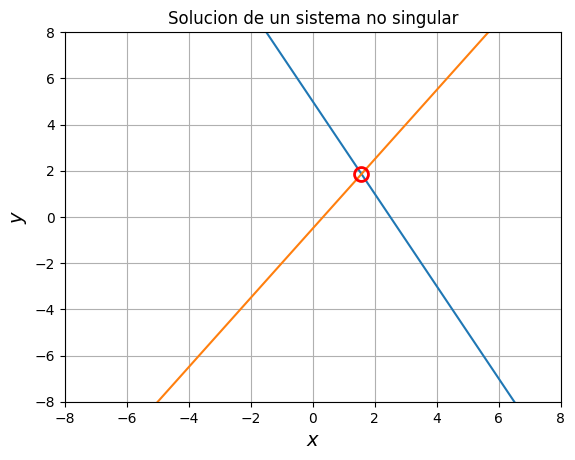

In [ ]:
# Graficación de un sistema 2x2

x = np.arange(-9,9)
y_1 = 5 - 2*x
y_2 = (3/2)*x - (1/2)

ecuaciones = [y_1, y_2]
graficar_soluciones(x,ecuaciones, A, b, 6, 'Solucion de un sistema no singular')


##### 1.2.1.1. Método de eliminación 2 X 2

Multiplicamos la ecuación dos para obtener el mísmo coeficiente en la variable $y$.

\begin{cases} 4 x + 2y = 10, \\ 3x - 2y = 1 \end{cases}

Sumamos las dos ecuaciones para eliminar la variable $y$.

\begin{equation}
(4x + 2y) + (3x - 2y) = 10 +1
\end{equation}

Esto se simplifica a $7x = 11$, por ende $x = 11/7$.

Se sustituye este valor para $x$ en la primera ecuación en la forma $2(11/7) + y = 5$, con lo cual obtenemos:

\begin{equation}
y = 5 -(22/7)
\end{equation}

Finalmente, encontramos que:

\begin{cases} x = \frac{11}{7} \\ y = \frac{13}{7} \end{cases}



Procedamos ahora a implementar éste método en Python. Para ello debemos representar la matriz de coeficientes $A$ como una matriz rectangular donde la última columna es adicionada para hacer las manipulaciones del sistema y constituye el vector columna de la solucion del sistema $b$.

In [ ]:
# Sistema de ecuaciones 2x2

print('b antes de un reshape = ', b)

b = b.reshape((2,1))
sistema_A = np.hstack(( A, b ))

print('b después de un reshape = ', b)
print(sistema_A)

b antes de un reshape =  [5. 1.]
b después de un reshape =  [[5.]
 [1.]]
[[ 2.  1.  5.]
 [ 3. -2.  1.]]


In [ ]:
# Aplicación del método de eliminación

M = sistema_A.copy()
M[0] = 2*M[0]
M[0] = M[0] + M[1]
M


array([[ 7.,  0., 11.],
       [ 3., -2.,  1.]])

Si observamos la matriz anterior, hemos eliminado una de las variables, asi, tenemos que $M[0,0] = 7$ y $M[0,2] = 11$, por lo tanto $x = M[0,2]/M[0,0]$.

In [ ]:
X = M[0,2] / M[0,0]
X

1.5714285714285714

Finalmente, el valor de $y$ es el siguiente:

In [ ]:
Y = 5 - 2*X
Y

1.8571428571428572

In [ ]:
print('La solución propuésta por eliminación es = ', np.array([X,Y]) )
print('La solución propuésta por Numpy es = ', np.linalg.solve(A,b))

La solución propuésta por eliminación es =  [1.57142857 1.85714286]
La solución propuésta por Numpy es =  [[1.57142857]
 [1.85714286]]


##### 1.2.1.2. Método de eliminación 3 X 3

Suponga el siguiente sistema de ecuaciones 3 x 3.

Multiplicamos la ecuación dos para obtener el mísmo coeficiente en la variable $y$.

$$\begin{cases}
2x + y - z = 5, \\ 3x - 2y + 2z = 1, \\ x + 4y + z = 8, \end{cases}\tag{1}$$

Multiplicamos la primera ecuación por dos para poder eliminar a continuación las variables $y$ y $z$.

$$\begin{cases}
4x + 2y - 2z = 10, \\ 3x - 2y + 2z = 1, \\ x + 4y + z = 8, \end{cases}\tag{1}$$


Sumamos las dos ecuaciones 1 y 2 para eliminar las variables $y$ y $z$.

\begin{equation}
(4x+2y-2z) + (3x-2y+2z) = 10 + 1\\
7x = 11 \\
x = \frac{11}{7}
\end{equation}

Usamos el valor de $x$ en la primera ecuación original:

\begin{equation}
2 (\frac{11}{7}) + y - z = 5 \\
y = \frac{-3}{7}
\end{equation}

Usamos los valores de $x$ y de $y$ en la tercera ecuación:

\begin{equation}
\frac{11}{7} + 4 (\frac{-3}{7}) + z = 8\\
z = 3
\end{equation}

Así llegamos a:

$$\begin{cases}
x = \frac{11}{7}, \\ y = \frac{-3}{7}, \\ z = 3, \end{cases}\tag{1}$$

Procedamos ahora a implementar éste método en Python. Para ello debemos representar la matriz de coeficientes $A$ como una matriz rectangular donde la última columna es adicionada para hacer las manipulaciones del sistema y constituye el vector columna de la solucion del sistema $b$.

In [ ]:
# Sistema lineal 3 x 3

A = np.array([
    [2, 1, -1],
    [3, -2, 2],
    [1, 4, 1]
], dtype = np.dtype(float))

b = np.array([5, 1, 8], dtype = np.dtype(float))

print('Matriz del problema 3 x 3')
print(A)
print('Vector solución del problema 3 x 3')
print(b)

Matriz del problema 3 x 3
[[ 2.  1. -1.]
 [ 3. -2.  2.]
 [ 1.  4.  1.]]
Vector solución del problema 3 x 3
[5. 1. 8.]


Agrupamos la matriz $A$ con el vector de solución $b$.

In [ ]:
# Construcción de la matriz M

b = b.reshape((3,1))
system_A = np.hstack((A,b))
system_A

array([[ 2.,  1., -1.,  5.],
       [ 3., -2.,  2.,  1.],
       [ 1.,  4.,  1.,  8.]])

In [ ]:
# Generación de una copia del sistema suma de las filas 1 y 2

M = system_A.copy()
M[0] = 2*M[0] + M[1]
M

array([[ 7.,  0.,  0., 11.],
       [ 3., -2.,  2.,  1.],
       [ 1.,  4.,  1.,  8.]])

In [ ]:
# Eliminación de la variable Z en la tercera ecuación e intercambio de filas 2 y 3

M[2] = -2*M[2] + M[1]
M_pivot = M.copy()
M[1] = M_pivot[2]
M[2] = M_pivot[1]
M

array([[  7.,   0.,   0.,  11.],
       [  1., -10.,   0., -15.],
       [  3.,  -2.,   2.,   1.]])

In [ ]:
# Hallamos X

X = M[0,3] / M[0,0]
X

1.5714285714285714

In [ ]:
# Hallamos Y reemplazando en la tercera ecuación y despejamos Y

Y = (-M[1,3]+X)/(-M[1,1])
Y

1.6571428571428573

In [ ]:
# Remplazamos X y Y en la ecuación 2 y despejamos Z

Z = (1 + 2*Y -3*X)/M[2,2]
Z

-0.19999999999999973

In [ ]:
print('La solución propuésta por eliminación es = ', np.array([X,Y,Z]) )
print('La solución propuésta por Numpy es = ', np.linalg.solve(A,b))

La solución propuésta por eliminación es =  [ 1.57142857  1.65714286 -0.2       ]
La solución propuésta por Numpy es =  [[ 1.57142857]
 [ 1.65714286]
 [-0.2       ]]


De manera general, la resolución de sistemas lineales por el método de eliminación se compone de trés manipulaciónes simples:
* Multiplicar una fila por un número no nulo.
* Sumar dos filas e intercambiar ina de las filas originales con el resultado de la adición.
* Intercambiar dos filas para asegurar la forma triangular de $A$.

Veámos un ejemplo de éstas operaciones resolviendo otro sistema 3 x 3 empleando funciones que ejecuten éstas operaciones.



In [ ]:
# Función para multiplicar los números de una fila

def MultiplicarFila(M, num_fila, multiplo):
  M_new = M.copy()
  M_new[num_fila] = M_new[num_fila] * multiplo
  return M_new

In [ ]:
# Función para multiplicar una fila por un número y sumarlas

def SumaFilas(M, num_fila_1, num_fila_2, multiplo):
  M_new = M.copy()
  M_new[num_fila_2] = multiplo * M_new[num_fila_1] + M_new[num_fila_2]
  return M_new

In [ ]:
# Intercambiar filas

def SwapRows(M, num_fila_1, num_fila_2):
  M_new = M.copy()
  M_new[[num_fila_1, num_fila_2]] = M_new[[num_fila_2, num_fila_1]]
  return M_new

Usemos éstas funciones con el siguiente sistema:


$$\begin{cases}
4x_1-3x_2+x_3=-10, \\ 2x_1+x_2+3x_3=0, \\ -x_1+2x_2-5x_3=17, \end{cases}\tag{1}$$

In [ ]:
A = np.array([
        [4, -3, 1],
        [2, 1, 3],
        [-1, 2, -5]
    ], dtype=np.dtype(float))

b = np.array([-10, 0, 17], dtype=np.dtype(float))

print("Matriz A:")
print(A)
print("\nVector Solución b:")
print(b)

print("Matriz M:")
A_system = np.hstack((A, b.reshape((3, 1))))
print(A_system)

Matriz A:
[[ 4. -3.  1.]
 [ 2.  1.  3.]
 [-1.  2. -5.]]

Vector Solución b:
[-10.   0.  17.]
Matriz M:
[[  4.  -3.   1. -10.]
 [  2.   1.   3.   0.]
 [ -1.   2.  -5.  17.]]


In [ ]:
M = SwapRows(A_system,0,2)
print(M)

[[ -1.   2.  -5.  17.]
 [  2.   1.   3.   0.]
 [  4.  -3.   1. -10.]]


In [ ]:
M = SumaFilas(M,0,1,2)
print(M)

[[ -1.   2.  -5.  17.]
 [  0.   5.  -7.  34.]
 [  4.  -3.   1. -10.]]


In [ ]:
M = SumaFilas(M,0,2,4)
print(M)

[[ -1.   2.  -5.  17.]
 [  0.   5.  -7.  34.]
 [  0.   5. -19.  58.]]


In [ ]:
M = SumaFilas(M,1,2,-1)
print(M)

[[ -1.   2.  -5.  17.]
 [  0.   5.  -7.  34.]
 [  0.   0. -12.  24.]]


In [ ]:
M = MultiplicarFila(M,2,-1/12)
print(M)

[[-1.  2. -5. 17.]
 [ 0.  5. -7. 34.]
 [-0. -0.  1. -2.]]


Como podémos ver, éstas simples operaciones nos permíten diagonalizar la matriz de coeficientes $A$, el requerimiento necesario para poder resolver el sistema lineal de manera sencilla. Ahora, solo básta remplazar de abajo para arriba los valores que vamos encontrando poco a poco a partir de ésta matriz.

In [ ]:
z = -2
y = (M[1,3] - M[1,2] * z) / M[1,1]
x = (M[0,3] - M[0,2] * z - M[0,1] * y) / M[0,0]

print('La solución propuésta por eliminación es ')
print([x, y, z])
print('La solución propuésta por Numpy es ')
print(np.linalg.solve(A,b))

La solución propuésta por eliminación es 
[1.0, 4.0, -2]
La solución propuésta por Numpy es 
[ 1.  4. -2.]


#### 1.2.2. Solución de sistemas lineales (indeterminados)

---
Sistema Compatible Indeterminado

---

Sistema singular con solución que posee información incompleta a cerca de las variables que lo conforman. Posee las siguientes características:
   1. Es aquel sistema de ecuaciones que posee tantas variables como incógnitas (`m = n`).
   2. No tiene solución.
   3. Si las ecuaciones son inconsistentes o contradictorias, el sistema no tiene solución.


A continuación se muéstra un ejemplo de esta clase de sistemas:

\begin{cases} -x + 3y = 7, \\ 3x - 9y = 1 \end{cases}

Singular matrix


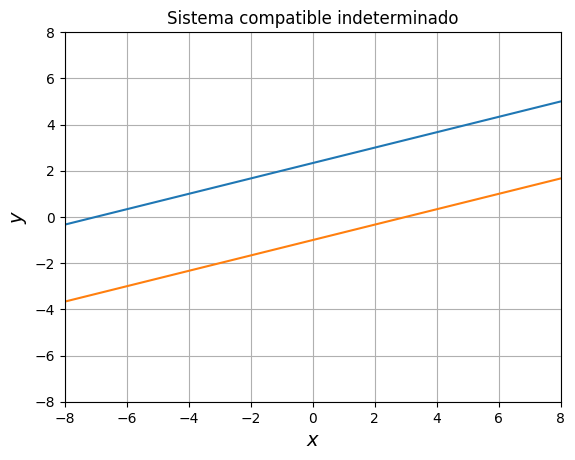

In [ ]:
# Representación del sistema en forma algebráica

A = np.array([
        [-1, 3],
        [3, -9]
    ], dtype=np.dtype(float))

b = np.array([7, 1], dtype=np.dtype(float))
#np.linalg.solve(A,b)


x = np.arange(-9,9)
y_1 = (7/3) + (1/3)*x
y_2 = (3/9)*x - 1

ecuaciones = [y_1, y_2]

graficar_soluciones(x,ecuaciones, A, b, 6, "Sistema compatible indeterminado")

Otro ejemplo de un sistema incompatible es el siguiente:

\begin{cases} - 3x + y = 5, \\ x + y = 3 \\  - 2x + y = 1 \end{cases}

Last 2 dimensions of the array must be square


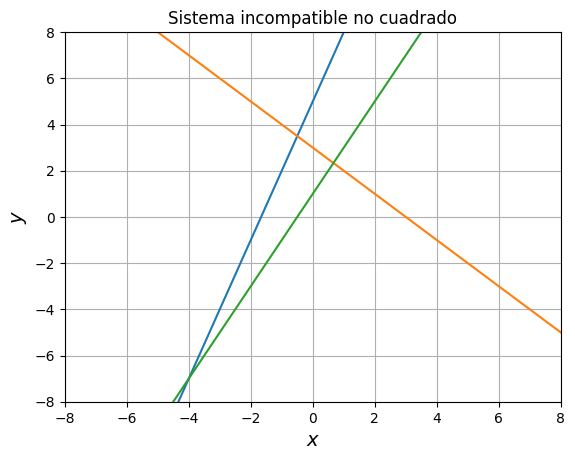

In [ ]:
# Representación del sistema en forma algebráica

A = np.array([
        [-3, 1],
        [1 , 1],
        [1, -2]
    ], dtype=np.dtype(float))

b = np.array([5, 3, 1], dtype=np.dtype(float))
#np.linalg.solve(A,b)


x = np.arange(-9,9)
y_1 = 3*x+5
y_2 = -x+3
y_3 = 2*x + 1

ecuaciones = [y_1, y_2, y_3]

graficar_soluciones(x,ecuaciones, A, b, 6, 'Sistema incompatible no cuadrado')

##### 1.2.2.1. Método de eliminación 2 X 2

A continuación intentaremos hallar una solución al sistema lineal 2 x 2:

\begin{cases} -x + 3y = 7, \\ 3x - 9y = 1 \end{cases}

In [ ]:
# Representación del sistema en forma algebráica

A = np.array([
        [-1, 3],
        [3, -9]
    ], dtype=np.dtype(float))

b = np.array([7, 1], dtype=np.dtype(float))

In [ ]:
# Comprovamos si el sistema tiene o no solución

try:
    solution = np.linalg.solve(A, b)
except np.linalg.LinAlgError as err:
    print(err)

Singular matrix


In [ ]:
# Formación de la matriz manipulable M

sistema_A = np.hstack((A, b.reshape((2, 1))))
print(sistema_A)

[[-1.  3.  7.]
 [ 3. -9.  1.]]


In [ ]:
# Multiplicación de la primera ecuación por 3 y adición de las dos ecuaciones lineales
M = sistema_A.copy()
M[1] = 3*M[0] + M[1]
print(M)

[[-1.  3.  7.]
 [ 0.  0. 22.]]


Como podémos ver ésta matriz provee información contradictoria ya que la última ecuación implicaría que $0 = 22$. Por ende éste sistema lineal no tiene solución.

##### 1.2.2.2. Método de eliminación 3 X 3

Dado el sistema de ecuaciónes lineales 3 x 3, intentarémos hallar una solución:

$$\begin{cases}
x + y + z = 2, \\ y - 3z = 1, \\ 2x + y+ 5z = 3, \end{cases}\tag{2}$$


In [ ]:
# Representación del sistema en forma algebráica

A= np.array([
        [1, 1, 1],
        [0, 1, -3],
        [2, 1, 5]
    ], dtype=np.dtype(float))

b = np.array([2, 1, 0], dtype=np.dtype(float))

print('Matriz del problema 3 x 3')
print(A)
print('Vector solución del problema 3 x 3')
print(b)
print('Matriz M = [A,B]')
sistema_A = np.hstack((A, b.reshape((3, 1))))
print(sistema_A)

Matriz del problema 3 x 3
[[ 1.  1.  1.]
 [ 0.  1. -3.]
 [ 2.  1.  5.]]
Vector solución del problema 3 x 3
[2. 1. 0.]
Matriz M = [A,B]
[[ 1.  1.  1.  2.]
 [ 0.  1. -3.  1.]
 [ 2.  1.  5.  0.]]


In [ ]:
# Multiplicamos la fila 1 por -2 y la sumamos a la fila 2
M = SumaFilas(sistema_A,0,2,-2)
print(M)

[[ 1.  1.  1.  2.]
 [ 0.  1. -3.  1.]
 [ 0. -1.  3. -4.]]


In [ ]:
# Sumamos la fila 2 de la matriz M con la fila 3
M = SumaFilas(M,1,2,1)
print(M)

[[ 1.  1.  1.  2.]
 [ 0.  1. -3.  1.]
 [ 0.  0.  0. -3.]]


Como podémos ver éste sistema no tiene solución, ya que la información provísta por las ecuaciónes es contradictoria ya que implicaría que $0 = -3$ fuera verdadero.

#### 1.2.3. Solución de sistemas lineales (incompatibles)

---
Sistema Incompatible

---

Sistema singular que no tiene solución y posee las siguientes características:

   1. Tiene soluciones infinitas.
   2. Las ecuaciones representan líneas o planos paralelos que no se intersectan.
   


A continuación se muéstra un ejemplo de esta clase de sistemas:

\begin{cases} -x + 3y = 7, \\ 3x - 9y = 21 \end{cases}

In [ ]:
# Representación del sistema en forma algebráica

A = np.array([
        [-1, 3],
        [3, -9]
    ], dtype=np.dtype(float))

b = np.array([7, -21], dtype=np.dtype(float))

print('Matriz del problema 3 x 3')
print(A)
print('Vector solución del problema 3 x 3')
print(b)
print('Matriz M = [A,B]')
sistema_A = np.hstack((A, b.reshape((2, 1))))
print(sistema_A)

Matriz del problema 3 x 3
[[-1.  3.]
 [ 3. -9.]]
Vector solución del problema 3 x 3
[  7. -21.]
Matriz M = [A,B]
[[ -1.   3.   7.]
 [  3.  -9. -21.]]


##### 1.2.3.1. Método de eliminación 2 X 2

Intentaremos resolver el sistema lineal anterior mediante eliminación, no obstante nos darémos cuenta de que esta labor no es posible.

In [ ]:
# Empleamos métodos de eliminación para intentar solucionar el sistema

M = sistema_A.copy()

# Multiplicamos la fila 1 por 3 y la sumamos a la fila 2.
M[1] = 3 * M[0] + M[1]
print(M)

[[-1.  3.  7.]
 [ 0.  0.  0.]]


Lo anterior implica que en sí, el sistema de ecuaciones solo está realmente descrito por una única ecuación.

$$\begin{cases}
-x + 3y = 7, \\ 0=0, \end{cases}\tag{7}$$

Así que la solución al sistema es

$$y = \frac{1}{3} x + \frac{7}{3}  \tag{8}$$

donde $y$ es cualquier número real que puede tomar infinitos valores, por ende, expisten infinítas soluciones.

Singular matrix


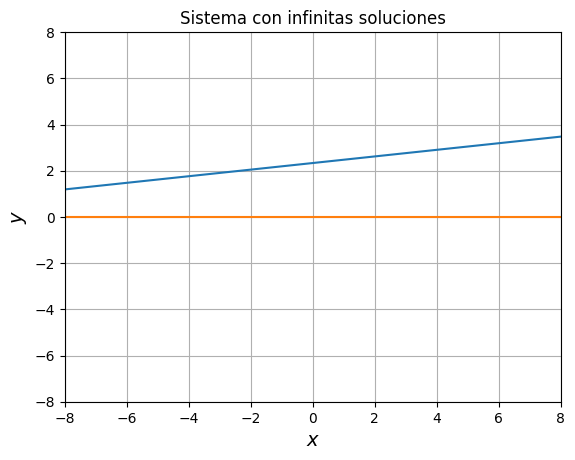

In [ ]:
# Graficamos el sistema de ecuaciónes lineales

x = np.arange(-9,9)
y_1 = (7/3) + (1/7)*x
y_2 = 0 * x

ecuaciones = [y_1, y_2]

graficar_soluciones(x,ecuaciones, A, b, 6, 'Sistema con infinitas soluciones')

##### 1.2.3.2. Método de eliminación 3 X 3

Considere el siguiente sistema lineal 3 x 3:

$$\begin{cases}
x + y + z = 2, \\ y - 3z = 1, \\ 2x + y + 5z = 3. \end{cases}\tag{3}$$

In [ ]:
# Representación del sistema en forma algebráica

A = np.array([
        [1, 1, 1],
        [0, 1, -3],
        [2, 1, 5]
    ], dtype=np.dtype(float))

b = np.array([2, 1, 0], dtype=np.dtype(float))

print('Matriz del problema 3 x 3')
print(A)
print('Vector solución del problema 3 x 3')
print(b)
print('Matriz M = [A,B]')
sistema_A = np.hstack((A, b.reshape((3, 1))))
print(sistema_A)

Matriz del problema 3 x 3
[[ 1.  1.  1.]
 [ 0.  1. -3.]
 [ 2.  1.  5.]]
Vector solución del problema 3 x 3
[2. 1. 0.]
Matriz M = [A,B]
[[ 1.  1.  1.  2.]
 [ 0.  1. -3.  1.]
 [ 2.  1.  5.  0.]]


In [ ]:
# multiply row 0 of the new matrix A_3_system by -2 and add it to the row 2
M = SumaFilas(sistema_A,0,2,-2)
print(M)

[[ 1.  1.  1.  2.]
 [ 0.  1. -3.  1.]
 [ 0. -1.  3. -4.]]


In [ ]:
# add row 1 of the new matrix A_3_ref to the row 2
M = SumaFilas(M,1,2,1)
print(M)

[[ 1.  1.  1.  2.]
 [ 0.  1. -3.  1.]
 [ 0.  0.  0. -3.]]


Lo anterior indica que el sistema lineal se reduce a:

$$\begin{cases}
x+y+z=2, \\ y-3z=1, \\ 0=0, \end{cases}\tag{4}$$

Se entiende que $y = 1 + 3 z$ al ser sustituída en la ecuación uno se encuentra que:

$$\begin{cases}
x=1-4z, \\ y=1+3z, \end{cases}\tag{5}$$

Donde $z$ puede ser cualquier número real, por ende, el sistema tiene infinítas soluciones.

# **2. Espacios y transformaciones lineales**

---
Espacios Vectoriales

---

Un `vector` es una entidad matemática que representa una magnitud y dirección en un espacio. En el contexto de álgebra lineal, los vectores son a menudo utilizados para representar puntos en un espacio euclidiano o como soluciones a sistemas de ecuaciones lineales. En $\mathbb{R}^n$ (espacio de los números reales en n dimensiones), en un espacio vectorial de $n$ dimensiones, un vector se expresa como $v = [v_1, v_2, v_3,...,v_n] ^T$, en donde $v_i$ es la componente correspondiente.

Con esto en mente, un conjunto $V$ es llamado un espacio vectorial sobre un campo $\mathbb{F}$ (el cuál podría ser los números reales $\mathbb{R}$ o los números completos $\mathbb{C}$) si satisface las siguientes propiedades para todos los vectores $u, v, w$ pertenecientes al conjunto $V$  y todos los números $a, b$ en $F$.

Para que un conjunto de vectores pueda considerarse como un espacio vectorial, todos los vectores del conjunto deben cumplir las siguientes propiedades:
1.  Cerradura bajo la Suma:
  * $u + v$ ∈ $V$
2.  Asociatividad de la Suma:
  * $(u + v) + w = u + (v + w)$  
3.  Existencia de Elemento Nulo:
  * Exíste un vector $0$ en $V$ tal que $v + 0 = v$ para todo $v$ en $V$.
4.  Existencia del Opuesto Aditivo:
  * Para cada $v$ en $V$, exíste un vector $-v$ en $V$ tal que  $v + (-v) = 0$.
5. Cerradura bajo la Multiplicación por Escalar:
  * $av$ pertenece a  $V$ donde $a$ pertenece a $\mathbb{F}$.
6. Compatibilidad de la multiplicación por escalar  con la suma de vectores:
  * $a(u + v) = a*u + av$ donde $a$ pertenece a $\mathbb{F}$.
7. Compatibilidad de la multiplicación por escalar con la suma de escalares:
  * $(a + b)v = av + bv$ donde $a$ pertenece a $\mathbb{F}$.

Estos axiomas establecen las propiedades fundamentales que deben cumplir los vectores y las operaciones en un espacio vectorial. Así pues, veámos a continuación como se operan los vectores y las matrices.

Un vector es una entidad matemática compuésta como un conjunto de números la cual posee las siguientes propiedades:
* ***Magnitud:*** La magnitud de un vector, también conocida como norma o longitud, representa la distancia desde el origen del espacio de coordenadas hasta el punto que el vector representa. La magnitud de un vector se calcula como la raiz cuadrada de la suma de todas las componentes de un vector al cuadrado.


\begin{equation}
\| \mathbf{v} \|= \sqrt{v_1^2 + v_2^2 + ... + v_i^2}
\end{equation}

* ***Dirección:***La dirección de un vector se refiere a la orientación o el ángulo que forma con respecto a un eje de referencia. Puede expresarse utilizando ángulos, cosenos directores o, en el caso de un vector bidimensional, simplemente usando la tangente inversa.

* ***Sentido:***El sentido de un vector indica la dirección en la que apunta en el espacio.

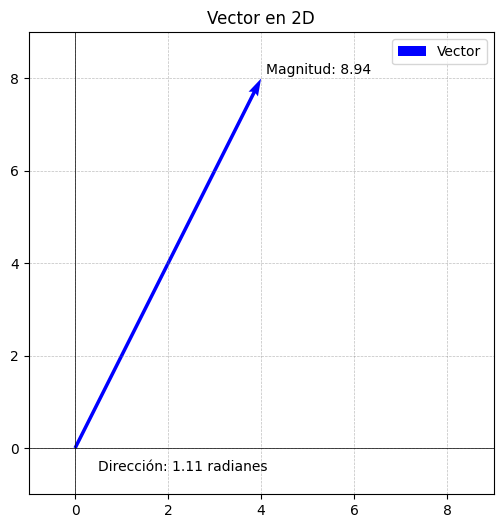

{'Magnitud': 8.94427190999916,
 'direccion': 1.1071487177940904,
 'sentido': 'Derecha'}

In [ ]:
# Propiedades de un vector en Numpy
vector = [4,8]
magnitud = np.linalg.norm(vector)
direccion = np.arctan2(vector[1], vector[0])
sentido = "Derecha" if vector[0] > 0 else "Izquierda"

propiedades = {
    'Magnitud': magnitud,
    'direccion': direccion,
    'sentido': sentido
}

# Propiedades de un vector en un espacio
plot_vector_propiedades(vector, -1,9)
propiedades

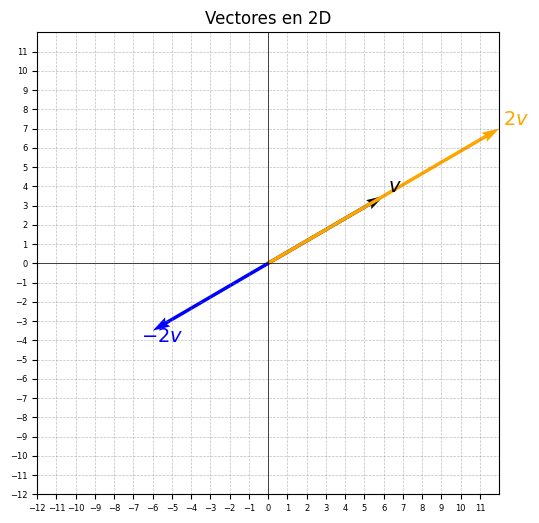

In [ ]:
# Escalamiento e inversión de sentido de un vector
v = np.array([[6],[3.5]])
v_escalado = 2 * v
v_sentido_opuesto = -v
plot_vectors([v, v_escalado, v_sentido_opuesto], [f"$v$", f"$2v$", f"$-2v$"], ["black", "Orange", "blue"], 12, 12)

### 2.1. Adición y sustracción de vectores

---
Suma y Resta de vectores

---

La suma de vectores se realiza sumando componente a componente. Gráficamente la suma de vectores se efectúa como se muéstra a continuación.

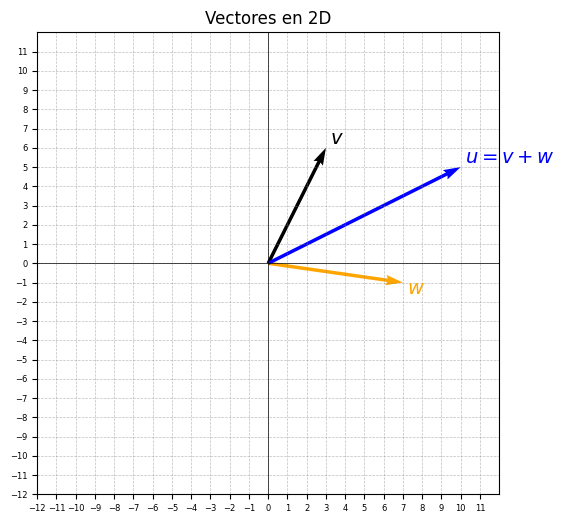

In [ ]:
# ESuma de Vectores (vectores y resultado)
v = np.array([[3],[6]])
w = np.array([[7],[-1]])
u = v + w

plot_vectors([v, w, u], [f"$v$", f"$w$", f"$u = v + w$"], ["black", "Orange", "blue"], 12, 12)

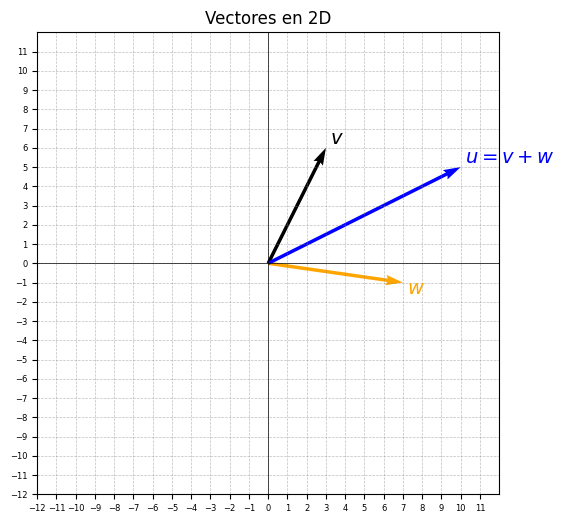

In [ ]:
# Suma de Vectores (vectores y resultado)
v = np.array([[3],[6]])
w = np.array([[7],[-1]])
u = v + w

plot_vectors([v, w, u], [f"$v$", f"$w$", f"$u = v + w$"], ["black", "Orange", "blue"], 12, 12)

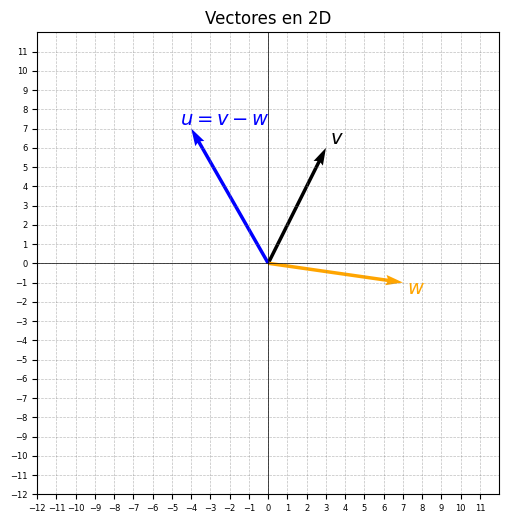

In [ ]:
# Resta de Vectores (vectores y resultado)
v = np.array([[3],[6]])
w = np.array([[7],[-1]])
u = v - w

plot_vectors([v, w, u], [f"$v$", f"$w$", f"$u = v - w$"], ["black", "Orange", "blue"], 12, 12)

### 2.2. Productos con vectores

---
Producto elemento-a-elemento


---

[[ 5]
 [-6]]


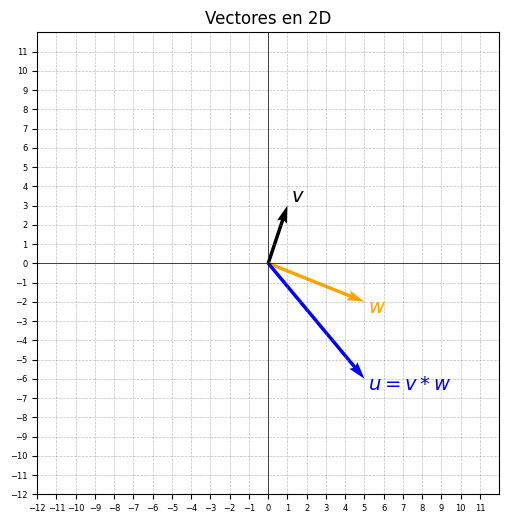

In [ ]:
# Resta de Vectores (vectores y resultado)
v = np.array([[1],[3]])
w = np.array([[5],[-2]])
u = v * w
print(u)
plot_vectors([v, w, u], [f"$v$", f"$w$", f"$u = v * w$"], ["black", "Orange", "blue"], 12, 12)

---
Producto Punto

---

El producto punto o producto escalar es una operación algebráica que toma dos vectores $x=\begin{bmatrix} x_1 & x_2 & \ldots & x_n \end{bmatrix}^T\in\mathbb{R}^n$ $y=\begin{bmatrix} y_1 & y_2 & \ldots & y_n \end{bmatrix}^T\in\mathbb{R}^n$ y regresa un escalar. El producto punto $x\cdot y$ se define como:

$$x\cdot y = \sum_{i=1}^{n} x_iy_i = x_1y_1+x_2y_2+\ldots+x_ny_n $$

In [ ]:
# Definición del producto punto

def dot(x,y):
  p = 0
  for i, j in zip(x,y):
    p += i * j
  return p

In [ ]:
# Producto punto de dos vectores
x = [1,-5,2,3]
y = [-1,4,-5,12]
p = dot(x,y)

print('El producto punto de sus vectores es (manual) =', dot(x,y))
print('El producto punto de sus vectores es (Numpy) =', np.dot(x,y))
print('El producto punto de sus vectores es (@)) =', np.array(x) @ np.array(y))

El producto punto de sus vectores es (manual) = 5
El producto punto de sus vectores es (Numpy) = 5
El producto punto de sus vectores es (@)) = 5


Los cálculos anteriores nos dejan ver que exísten dos formas para calcular un producto punto, donde el uso de ciclos `for()` (la manera manual) difiere del cálculo de la forma vectorizada (usando la librería `Numpy`) simplemente en que emplear un paradigma vectorizado permite correr las operaciones necesarias en paralelo.

Veamos ésto con un cálculo simple y determinemos el tiempo que tarda cada operación en llevarse a cabo.

In [ ]:
a = np.random.rand(1000000)
b = np.random.rand(1000000)

Para esto, la función `time.time()` nos permite calcular en segundos el tiempo requerido para llevar a cabo el producto punto.

In [ ]:
# Cálculo de tiempos de un producto punto manual

import time

inicio = time.time()
c = dot(a,b)
fin = time.time()

print('Producto punto manal =', c)
print('El tiempo gastado para un producto punto manual es '+
      str(round(1000*(fin-inicio),4)) + 'ms')

Producto punto manal = 250399.66416258758
El tiempo gastado para un producto punto manual es 1862.3435ms


In [ ]:
# Cálculo de tiempos de un producto punto vectorizado

import time

inicio = time.time()
c = np.dot(a,b)
fin = time.time()

print('Producto punto manal =', c)
print('El tiempo gastado para un producto punto vectorizado es '+
      str(round(1000*(fin-inicio),4)) + 'ms')

Producto punto manal = 250399.6641625852
El tiempo gastado para un producto punto vectorizado es 7.5004ms


---
Interpretación geométrica del producto punto entre vectores

---

El producto punto, también conocido como producto escalar, es una operación fundamental en álgebra lineal que tiene una rica interpretación geométrica, especialmente en el espacio bidimensional, la cual, en forma generál puede entenderse como una métrica de distancia o similaridad entre vectores.

Geométricamente, el producto punto entre dos vectores es igual al producto de sus magnitudes y el coseno del ángulo $θ$ entre ellos, lo cual es igual a la magnitud de la proyección de un vector $w$ sobre el otro $w$:

$$v\cdot w = \lvert v\rvert \lvert w\rvert \cos(\theta)$$

Esto nos permite una manera sencilla de evaluar la ortogonalidad entre dos vectores, donde si $v$ y $w$ son ortogonales (el ángulo entre los dos es de $90^{\circ}$ grados), entonces su $\cos(c)=0$ y por ende, el producto punto entre los dos, es decir, la magnitud de la proyección de un vector sobre otro, debe ser igual a cero.

En términos prácticos, la similaridad entre dos vectores no se establece desde el producto punto en sí sino a partir del ángulo que los vectores forman. Esto se debe a que si los vectores poseen la mísma dirección $\cos(90^{\circ})=1$ indicando una similaridad máxima y $\cos(90^{\circ})=-1$ una "antisimilaridad" mientras que  $\cos(90^{\circ})=0$ implica similaridad nula. Por ende, la similarided de cosenos es definida como:

$$\cos(\theta)=\frac{v \cdot w}{\lvert v\rvert \lvert w\rvert}$$



Para ilustrar lo anterior, veamos cómo el producto punto puede entenderse gráficamente, donde para un producto punto entre $v$ y $w$ éste corresponde a la magnitud de la proyección de $w$ sobre la dirección de $v$.

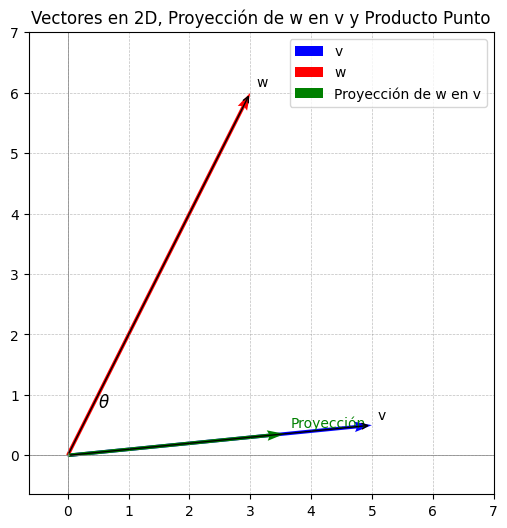

Producto Punto: 18.0
Ángulo entre los vectores en radianes: 1.01


In [ ]:
# Ejemplo de producto punto de vectores
v = np.array([5, 0.5])
w = np.array([3, 6])
visualizar_dot(v, w)

Por otra parte, si dos vectores son ortogonales entonces la proyección tendrá un valor nulo.

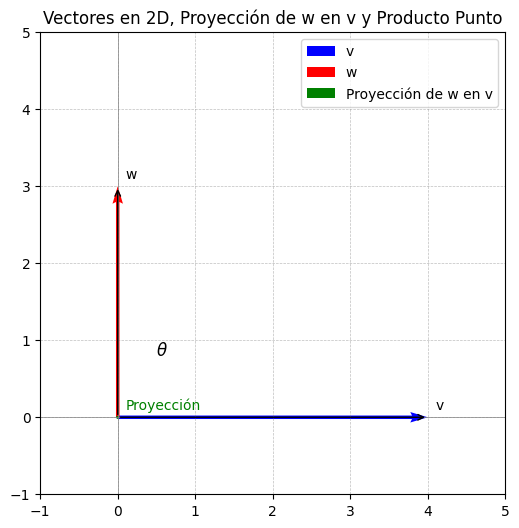

Producto Punto: 0
Ángulo entre los vectores en radianes: 1.57


In [ ]:
# Ejemplo de producto punto de vectores perpenticulares
v = np.array([4, 0])
w = np.array([0, 3])
visualizar_dot(v, w)

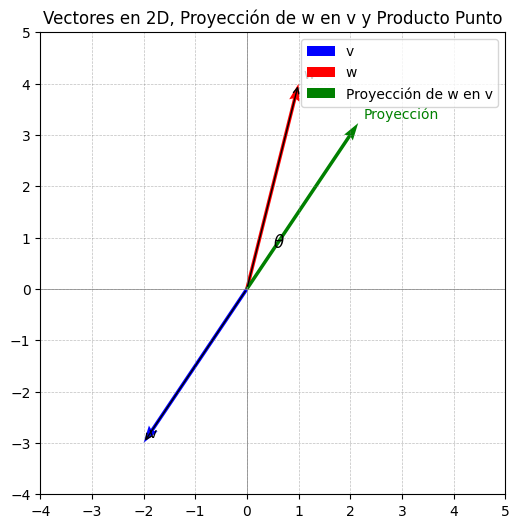

Producto Punto: -14
Ángulo entre los vectores en radianes: 2.80


In [ ]:
# Ejemplo de producto punto negativo
v = np.array([-2, -3])
w = np.array([1, 4])
visualizar_dot(v, w)

Note entonces que la proyección de  $w$ sobre $v$ ocurre sobre la ***dirección*** del vector $v$, por ende, si el ángulo entre los vectores es mayor a  $θ = 90^{\circ}$ entonces la proyección tendrá lugar en el sentido opuésto al vector $v$, por ende, el producto punto es negativo.

---
Producto Cruz

---

El producto cruz es una operación vectorial crucial en álgebra lineal, particularmente en el espacio tridimensional. Dado dos vectores tridimensionales $v$ y $w$, el producto cruz se define como:

$$
v \times w = \begin{bmatrix}
    v_2w_3 - v_3w_2 \\
    v_3w_1 - v_1w_3 \\
    v_1w_2 - v_2w_1
\end{bmatrix}
$$

Geométricamente, el resultado del producto cruz es un nuevo ***vector perpendicular*** al plano definido por $v$ y $w$. Aquí hay aspectos clave de la interpretación geométrica del producto cruz:
* ***Dirección del Nuevo Vector:*** El nuevo vector resultante del producto cruz es perpendicular al plano formado por $v$ y $w$. La regla de la mano derecha se utiliza comúnmente para determinar la dirección del nuevo vector.
* ***Magnitud del Nuevo Vector:*** La magnitud del vector resultante es proporcional al área del paralelogramo definido por $v$ y $w$. Cuanto mayor sea el área, mayor será la magnitud del producto cruz.

$$|v\times w| = \lvert v\rvert \lvert w\rvert \sin(\theta)$$

* ***Orientación Relativa de los Vectores:*** La orientación del nuevo vector depende del orden de los vectores en el producto cruz. Si se intercambian $v$ y
$w$, la dirección del nuevo vector también se invierte.





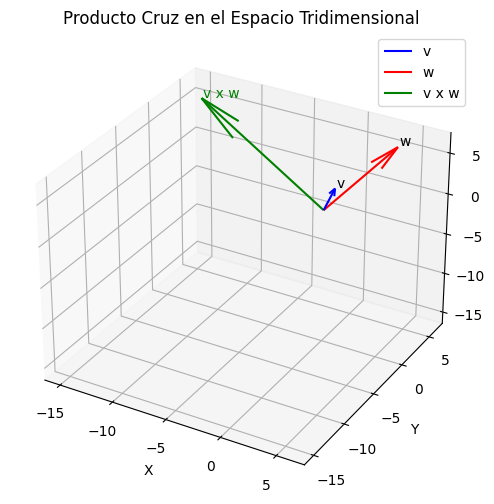

In [ ]:
# Producto cruz entre dos vectores
v = np.array([1, 0, 3])
w = np.array([4, 5, 6])
visualizar_producto_cruz(v, w)

### 2.3. Matríces y transformaciones lineales

---
Matrices como transformaciones lineales

---
Las matríces son arreglos bidimensionales de números. Una matriz $A$ con dimensiones $m \times n$ contiene $m$ filas y $n$ columnas. Cada elemento $A_{ij}$ de la matriz representa una entrada de la fila $i$ y columna $j$. Las matrices son herramientas versátiles que pueden usarse para representar sistemas de ecuaciones lineales y transformaciones lineales.

Se dice que una matriz $A$ puede ser interpretada como una transformación ya que al operar un vector $v$ perteneciente a  \mathbb{R}^n con ésta, producirá otro vector $w$ que pertenecerá a \mathbb{R}^m mediante la multiplicación matriz-vector.

$$ w = Av$$

Formalmente, una transformación es una función que toma un vector de un espacio y lo lleva a otro espacio respetando la estructura lineal. Específicamente, si $T$ es una transformación, entonces $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$, transformando un vector $v \in \mathbb{R}^n$ en un vector  $w\in\mathbb{R}^m$ tal que $T(v)=w$ donde $n$ es el número de columnas de $A$ y $m$ su número de filas. Así, se tiene que $T(v) = Av$

Una transformación es lineal si cumple las siguientes dos propiedades, donde $k$ es un escalar:
1. $T(kv)=kT(v)$,
2. $T(u+v)=T(u)+T(v)$.

In [ ]:
# Ejemplo de una transformación lineal
def T(v):
    w = np.zeros((3,1))
    w[0,0] = 4*v[0,0]
    w[2,0] = -3*v[1,0]

    return w

In [ ]:
# Confirmación de la linealidad de T
u = np.array([[7], [-3]])
v = np.array([[1], [3]])

k = 7

print('Propiedad de escalabilidad:')
print('*'*20)
print("T(k*v):\n", T(k*v),'\n')
print( "k*T(v):\n", k*T(v))
print('*'*20)
print('Propiedad distributiva:')
print('*'*20)
print("T(u+v):\n", T(u+v),'\n')
print("T(u)+T(v):\n", T(u)+T(v))
print('*'*20)

Propiedad de escalabilidad:
********************
T(k*v):
 [[ 28.]
 [  0.]
 [-63.]] 

k*T(v):
 [[ 28.]
 [  0.]
 [-63.]]
********************
Propiedad distributiva:
********************
T(u+v):
 [[32.]
 [ 0.]
 [ 0.]] 

T(u)+T(v):
 [[32.]
 [ 0.]
 [ 0.]]
********************


Específicamente $T: \mathbb{R}^m \rightarrow \mathbb{R}^n$ es definida como una matriz $A$, donde $T(v)=Av$, donde la multiplicación de una matriz $A$ ($n\times m$) y el vector $v$ ($m\times 1$) resulta en un vector $w$ ($n\times 1$).

In [ ]:
# Matrices como transformaciones lineales

def T(v):
  A = np.array([[1.5,0], [2,0], [0,-2]])
  print("Matriz de transformación:\n", A, "\n")
  w = A @ v
  return w

# Transformación de un vector mediante una transformación lineal
v = np.array([[2],[7]])
w = T(v)

print("Vector Original:\n", v, "\n\n Vector resultante de la transformacion:\n", w)

Matriz de transformación:
 [[ 1.5  0. ]
 [ 2.   0. ]
 [ 0.  -2. ]] 

Vector Original:
 [[2]
 [7]] 

 Vector resultante de la transformacion:
 [[  3.]
 [  4.]
 [-14.]]


Matriz de transformación:
 [[ 1.5  0. ]
 [ 2.   0. ]
 [ 0.  -2. ]] 



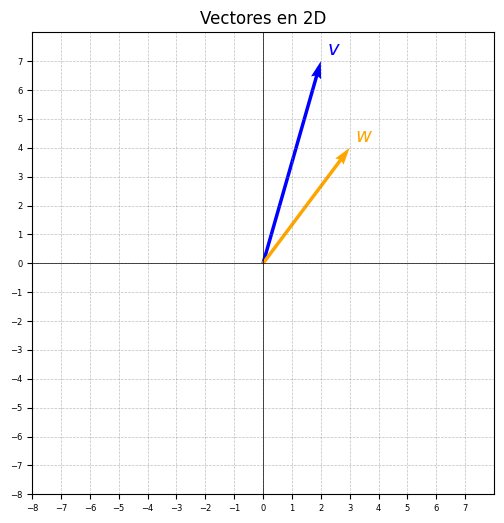

In [ ]:
# Transofrmación lineal aplicada a un vector
v = np.array([[2],[7]])
w = T(v)
plot_vectors([v, w], [f"$v$", f"$w$"], [ "blue", "Orange"], 8, 8)

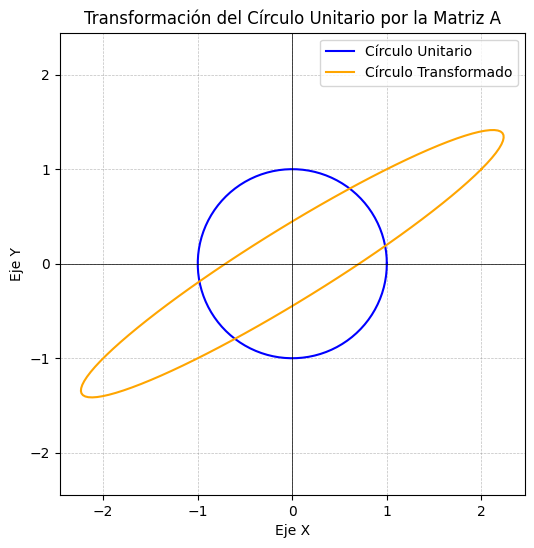

In [ ]:
# Ejemplo de uso: Define tu matriz A
A = np.array([[2, 1], [1, 1]])
transformacion_de_espacio(A)

##### 3.2.1 Operaciones con matrices

---
Multiplicación de matrices

---

Considerando dos matrices, una $A$ de dimensiones $m \times n$ y otra $B$ de dimensiones $n \times p$, el producto matricial $C = AB$ posee dimensiones $m \times p$ tal que:

$$C_{ij}=A_{i1}B_{1j}+A_{i2}B_{2j}+\ldots+A_{in}B_{nj}=\sum_{k=1}^{n} A_{ik}B_{kj} $$

Donde $A_{ik}$ son los elementos de la matriz $A$, $B_{kj}$ son los elementos de la matriz $B$, y $i = 1, \ldots, m$, $k=1, \ldots, n$, $j = 1, \ldots, p$. En resumen, **$C_{ij}$ es el producto punto** de la fila $i$-ésima de $A$ y la columna $j$-ésima de $B$.

In [ ]:
# Multiplicación simple de matrices
A = np.array([[1, 6, 3], [3, 9, 5], [5, 2, 3]])
B = np.array([[1, 0], [3, 7], [4, 5]])

try:
  np.matmul(B,A)
except:
  print('No podemos multiplicar estas matrices ya que no tienen dimensiones coincidentes.')

print('El producto adecuado entre éstas matrices es AB:')
print(np.matmul(A,B))
print('El producto adecuado entre éstas matrices es AB:')
print(A @ B)

No podemos multiplicar estas matrices ya que no tienen dimensiones coincidentes.
El producto adecuado entre éstas matrices es AB:
[[31 57]
 [50 88]
 [23 29]]
El producto adecuado entre éstas matrices es AB:
[[31 57]
 [50 88]
 [23 29]]


Para que un producto de matríces pueda ejecutarse, el número de columnas de la primera matriz $A$ debe coincidir con el número de filas de la segunda matriz $B$. Muchas veces, para poder ejecutar correctamente éstos productos será útil usar el comando `.reshape()`, el cual asigna otra forma (número de filas y columnas) a un vector o matriz con base a los elementos disponibles. Por ejemplo, veamos a continuación como un vector unidimensional puede ser transformado en una matriz y una matriz en un vector

In [ ]:
# Ejemplo de forma y dimensiones de un vector
x = np.array([1, -2, -5])
A = np.array([[1, 6, 3], [3, 9, 5], [5, 2, 3]])

print("*"*40)
print("Forma de un vector x:", x.shape)
print("Número de dimensiones de un vector x:", x.ndim)
print("Forma de un vector x, transformado a una matriz:", x.reshape((3, 1)).shape)
print("Número de dimensiones de x, transformado a una matriz:", x.reshape((3, 1)).ndim)
print("*"*40)
print("Forma de una matriz A:", A.shape)
print("Número de dimensiones de una matriz A:", A.ndim)
print("Forma de una matriz A, transformado a un vector:", A.reshape(-1).shape)
print("Número de una matriz A, transformado a un vector:", x.reshape(-1).ndim)
print("*"*40)

****************************************
Forma de un vector x: (3,)
Número de dimensiones de un vector x: 1
Forma de un vector x, transformado a una matriz: (3, 1)
Número de dimensiones de x, transformado a una matriz: 2
****************************************
Forma de una matriz A: (3, 3)
Número de dimensiones de una matriz A: 2
Forma de una matriz A, transformado a un vector: (9,)
Número de una matriz A, transformado a un vector: 1
****************************************


Las propiedades básicas del producto entre matrices son:
* Asociatividad: La multiplicación de matrices es asociativa, lo que significa que $(AB)C = A (BC)$ para matrices adecuadas.
* Elemento Neurtro: La matriz identidad actúa como el elemento neutro para la multiplicación de matrices. Para cualquier matriz $A$, se cumple que $AI=IA=A$.
* No conmutatividad: En general, la multiplicación de matrices no es conmutativa. Esto significa que $AB \neq BA$.
* Distributividad sobre la suma: La multiplicación de una matriz por una suma de dos matrices es distributiva, lo cual se expresa como $A(B+C) = AB+AC$.
* Propiedad de escalares: La multiplicación de una matriz por un escalar y luego por otra matriz es equivalente a la multiplicación de la matriz original por el producto de los dos escalares. Esto se expresa como $(cA)B = c(AB)$.
* Propiedad de la Transporisción: La transposición de un producto de matrices es igual al producto de las matrices transpuestas en un orden inverso, es decir $(AB)^T = B^T A^T$.

In [ ]:
# Definir matrices A, B y C
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.array([[9, 10], [11, 12]])

In [ ]:
# Propiedad de Asociatividad
asociatividad_left = np.dot(A, np.dot(B, C))
asociatividad_right = np.dot(np.dot(A, B), C)

print("Propiedad de Asociatividad:")
print(asociatividad_left)
print(asociatividad_right)
print()

Propiedad de Asociatividad:
[[ 413  454]
 [ 937 1030]]
[[ 413  454]
 [ 937 1030]]



In [ ]:
# Propiedad de Elemento Neutro
matriz_identidad = np.eye(2)
neutro_left = np.dot(A, matriz_identidad)
neutro_right = np.dot(matriz_identidad, A)

print("Propiedad de Elemento Neutro:")
print(neutro_left)
print(neutro_right)
print()

Propiedad de Elemento Neutro:
[[1. 2.]
 [3. 4.]]
[[1. 2.]
 [3. 4.]]



In [ ]:
# Propiedad de No Conmutatividad
conmutatividad_left = np.dot(A, B)
conmutatividad_right = np.dot(B, A)

print("Propiedad de No Conmutatividad:")
print(conmutatividad_left)
print(conmutatividad_right)
print()

Propiedad de No Conmutatividad:
[[19 22]
 [43 50]]
[[23 34]
 [31 46]]



In [ ]:
# Propiedad de Distributividad sobre la Suma
D = np.array([[13, 14], [15, 16]])
distributividad_left = np.dot(A, (B + C))
distributividad_right = np.dot(A, B) + np.dot(A, C)

print("Propiedad de Distributividad sobre la Suma:")
print(distributividad_left)
print(distributividad_right)
print()

Propiedad de Distributividad sobre la Suma:
[[ 50  56]
 [114 128]]
[[ 50  56]
 [114 128]]



In [ ]:
# Propiedad de Escalares
c = 2
escalar_left = np.dot(c * A, B)
escalar_right = c * np.dot(A, B)

print("Propiedad de Escalares:")
print(escalar_left)
print(escalar_right)
print()

Propiedad de Escalares:
[[ 38  44]
 [ 86 100]]
[[ 38  44]
 [ 86 100]]



In [ ]:
# Propiedad de Trasposición
trasposicion_left = np.dot(A, B).T
trasposicion_right = np.dot(B.T, A.T)

print("Propiedad de Trasposición:")
print(trasposicion_left)
print(trasposicion_right)

Propiedad de Trasposición:
[[19 43]
 [22 50]]
[[19 43]
 [22 50]]


# **3. Métodos de detección de solucionabilidad**

Resolver sistemas de ecuaciónes lineales puede llegar a ser complicado, y los métodos manuales no nos proveen de información previa que nos permíta reconocer si el sistema en cuestión tiene solución o no. Ésta sección está dedicada a estudiar ciertas propiedades de la matriz de coeficientes  $A$ que nos permitirán deducir cuando un sistema de ecuaciónes es solucionable.

Un sistema ***no singular*** significa que la matriz de coeficientes $A$ no es singular, lo que quiere decir que su determinante es diferente de cero tal que $det(A)\neq 0$.  Por otra parte un sistema ***singular*** es aquel cuya matriz de coeficientes $A$  posee un determinante igual a cero tal que $det(A)=0$.

El determinante de una matriz es una magnitud escalar asociada a dicha matriz y desempeña un papel crucial en el álgebra lineal. Se denota comúnmente por
$det(A)$ o $|A|$. La definición del determinante se aborda principalmente para matrices cuadradas.

Dada una matriz cuadrada $A = [A_{ij}]_{n \times m}$, el determinante $det(A)$ se define recursivamente para matrices de orden $n\ge 2$ de la siguiente manera:

\begin{equation}
det(A) = \sum_{i=1}^{n} (-1)^{i+j} A_{ij} det(\hat{A}_{ij})
\end{equation}

Donde $\hat{A}_{ij}$ es la matriz obtenida al eliminar la fila $i$ y la columna $j$ de la matriz original $A$. Para matrices de orden 1, el determinante es simplemente el único elemento en la matriz tal que $det(A)=A_{11}$.

Por ejemplo, para una matriz $2\times 2$ el determinante es:

$$det(A) = |A| = A_{11}A_{22} - A_{12}A_{21}$$

Por otra parte, el determinante de una matriz $3 \times 3$ es:

$$det(A) = A_{11} | \hat{A_{11}} | - A_{12} | \hat{A_{12}} | + A_{13} | \hat{A_{13}} |$$

$$det(A) = A_{11} (A_{22}A_{33}-A_{23}A_{32}) - A_{12} (A_{21}A_{33}-A_{23}A_{31}) + A_{13} (A_{21}A_{32}-A_{22}A_{31}) $$

Puede notar, que el proceso de hallar el determinante de una matriz es un proceso iterativo, por ahora nos limitaremos a hallar el determinante de matrices de $2 \times 2$ y $3 \times 3$.

---
Interpretación del determinante y utilidad en el Álgebra Lineal

---

El determinante de una matriz cuadrada es un número escalar que se obtiene mediante una combinación de operaciones algebraicas en los elementos de la matriz. Dentro de las utilidades de ésta propiedad encontramos:

* ***Invertibilidad y Sistema de Ecuaciones Lineales:***Una matriz cuadrada $A$ es invertible (no singular) si y solo si su determinante es distinto de cero ($det(A)\neq 0$). Esta propiedad nos permite saber si el sistema tiene solución o no.

* ***Volumen y Transformaciones Lineales:*** El valor absoluto del determinante de una matriz cuadrada $|A|=k$ proporciona el factor de escala por el cual las transformaciones lineales representadas por $A$ modifican los volúmenes en el espacio. Es decir, el determinante mide la dilatación o compresión que unduce la matriz en el espacio.
* ***Orientación:*** El signo del determinante indica si la transformación asociada a la matriz invierte la orientación del espacio. Un determinante positivo preserva la orientación, mientras que un determinante negativo invierte la orientación.

* ***Independencia Lineal:*** El determinante también está relacionado con la independencia lineal de los vectores represnetados por las columnas (o filas)  de la matriz. Si el determinante es cero, implica que los vectores  que conforman la matriz son linealmente dependientes.

* ***Área y Volumen en Geometría:*** En geometría, el determinante se utiliza para calcular áres en el plano y volúmenes en el espacio, especialmente cuando se trabaja con coordenadas cartesianas.

In [ ]:
# Función para hallar el determinante de matrices 2x2
def determinante_matriz_2x2(matriz):
    # Asegurarse de que sea una matriz 2x2
    if len(matriz) != 2 or len(matriz[0]) != 2 or len(matriz[1]) != 2:
        raise ValueError("La matriz no es 2x2")

    # Calcular el determinante
    det = matriz[0][0] * matriz[1][1] - matriz[0][1] * matriz[1][0]

    return det

In [ ]:
# Función para hallar el determinante de matrices 3x3
def determinante_matriz_3x3(matriz):
    # Asegurarse de que sea una matriz 3x3
    if len(matriz) != 3 or len(matriz[0]) != 3 or len(matriz[1]) != 3 or len(matriz[2]) != 3:
        raise ValueError("La matriz no es 3x3")

    # Calcular el determinante utilizando la regla de Sarrus
    det = (
        matriz[0][0] * (matriz[1][1] * matriz[2][2] - matriz[1][2] * matriz[2][1]) -
        matriz[0][1] * (matriz[1][0] * matriz[2][2] - matriz[1][2] * matriz[2][0]) +
        matriz[0][2] * (matriz[1][0] * matriz[2][1] - matriz[1][1] * matriz[2][0])
    )

    return det

In [ ]:
# Ejemplo de uso
matriz_2x2 = [[2, 3], [4, 5]]
matriz_3x3 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

det_2x2 = determinante_matriz_2x2(matriz_2x2)
det_3x3 = determinante_matriz_3x3(matriz_3x3)

print("Determinante de la matriz 2x2:", det_2x2)
print("Determinante de la matriz 3x3:", det_3x3)

Determinante de la matriz 2x2: -2
Determinante de la matriz 3x3: 0


### 3.1. Independencia lineal

En álgebra lineal, la independencia lineal es un concepto crucial que describe la relación entre los vectores en una matriz. Un conjunto de vectores se considera linealmente independiente si ningún vector en el conjunto puede ser expresado como una combinación lineal de los demás.

En el siguiente ejemplo, tenémos una matriz con dependencia lineal (singular) donde $A_3 = 3A_1 + 2A_2$.

In [ ]:
# Matriz con dependencia lineal
A = np.array([
    [1,0,1],[0,1,0],[3,2,3]
])

# Calcular el determinante
determinante = np.linalg.det(A)

# Verificar la independencia lineal
if determinante != 0:
    print("Los vectores son linealmente independientes.")
else:
    print("Los vectores son linealmente dependientes.")

Los vectores son linealmente dependientes.


En el siguiente ejemplo, tenémos una matriz con dependencia lineal (singular) donde $A_3 = A_1 - A_2$.

In [ ]:
# Matriz con dependencia lineal
A = np.array([
    [1,1,1],[1,1,2],[0,0,-1]
])

# Calcular el determinante
determinante = np.linalg.det(A)

# Verificar la independencia lineal
if determinante != 0:
    print("Los vectores son linealmente independientes.")
else:
    print("Los vectores son linealmente dependientes.")

Los vectores son linealmente dependientes.


A continuación se muéstra una matriz con independencia lineal entre las filas que la conforman.

In [ ]:
# Matriz con independencia lineal
A = np.array([
    [1,1,1],[0,2,2],[0,0,3]
])

# Calcular el determinante
determinante = np.linalg.det(A)

# Verificar la independencia lineal
if determinante != 0:
    print("Los vectores son linealmente independientes.")
else:
    print("Los vectores son linealmente dependientes.")

Los vectores son linealmente independientes.


### 3.2. Matriz Inversa

---
Matriz inversa

---

Dada una matriz cuadrada $A$ de orden $n \times n$, la matriz inversa de $A$, denotada como $A^{-1}$ es aquella que, cuando multiplicamos $A$ por su inversa, el resultado es la matriz identidad $I_n$.

$$A A^{-1} = A^{-1} A = I_{n}$$

Sin embargo, no todas las matrices tienen una inversa. Para que exista una matriz inversa, la matriz original debe ser no singular, es decir, su determinante debe ser distinto de cero.

El cálculo de la matriz inversa viene dado por:

$$A^{-1} = \frac{1}{|A|} adj(A)$$

Donde $|A|$ es el determinante de $A$ y $adj(A)$ es la matriz adjunta. Los elementos de la matriz adjunta son iguales a:

$$C_{ij} = (-1)^{i+j} |M_{ij}|$$
$$adj(A)_{ij} = C_{ji}$$

Donde $|M_{ij}|$ es el determinante de la matriz obtenida al eliminar la fila $i$ y la columna $j$ de la matriz iriginal $A$. La matriz $C$ es denominada como la matriz de cofactores, así, la relación anterior nos indica que la matríz adjunta es igual a la transpuesta de la ***matriz de cofactores*** tal  que $adj(A) = C^T$, donde una ***matriz transpuesta*** es aquella que se obtiene intercambiando las filas y columnas de la matriz original.

La matriz inversa tiene aplicaciones útiles tales como:
* ***Resolución de sistemas de ecuaciones lineales:***La matriz inversa se utiliza para resolver sistemas de ecuaciones lineales de manera eficiente mediante la multiplicación de matrices.
* ***Transformación lineal inversa:***En geometría y gráficos por computadora, la matriz inversa es crucial para revertir transformaciones lineales, como traslaciones y rotaciones.

El siguiente código calcula una matriz adjunta.

In [ ]:
# Funciones para calcular matrices adjuntas

def cofactor(matriz, i, j):
    # Función para calcular el cofactor de la matriz eliminando la fila i y la columna j
    return (-1) ** (i + j) * determinante_submatriz(matriz, i, j)

def determinante_submatriz(matriz, i, j):
    # Función para calcular el determinante de la submatriz eliminando la fila i y la columna j
    submatriz = [fila[:j] + fila[j+1:] for fila in (matriz[:i] + matriz[i+1:])]
    return determinante(submatriz)

def determinante(matriz):
    # Función para calcular el determinante de una matriz cuadrada
    if len(matriz) == 1:
        return matriz[0][0]
    elif len(matriz) == 2:
        return matriz[0][0] * matriz[1][1] - matriz[0][1] * matriz[1][0]
    else:
        det = 0
        for j in range(len(matriz[0])):
            det += matriz[0][j] * cofactor(matriz, 0, j)
        return det

def matriz_adjunta(matriz):
    # Función para calcular la matriz adjunta
    n = len(matriz)
    adjunta = [[0] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            adjunta[i][j] = cofactor(matriz, j, i)  # Intercambiamos i y j para obtener la transpuesta

    return adjunta

La siguiente función calcula una matriz inversa.

In [ ]:
# Cálculo de una matriz inversa
def matriz_inversa(matriz):
    # Función para calcular la matriz inversa
    det = determinante(matriz)
    if det == 0:
        raise ValueError("La matriz no tiene inversa")

    n = len(matriz)
    inversa = [[0] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            cof = cofactor(matriz, i, j)
            inversa[i][j] = cof / det

    return inversa

Veamos un ejemplo del cálculo de una matriz inversa

In [ ]:
# Cálculo de una matriz adjunta manual

matriz_ejemplo = [
    [2, 3, 1],
    [1, 2, 0],
    [4, 1, -2]
]

adjunta_ejemplo = matriz_adjunta(matriz_ejemplo)

print("Matriz Original:")
for fila in matriz_ejemplo:
    print(fila)

print("\nMatriz Adjunta:")
for fila in adjunta_ejemplo:
    print(fila)


Matriz Original:
[2, 3, 1]
[1, 2, 0]
[4, 1, -2]

Matriz Adjunta:
[-4, 7, -2]
[2, -8, 1]
[-7, 10, 1]


In [ ]:
# Calcular la matriz inversa con la función definida
inversa_manual = matriz_inversa(matriz_ejemplo)

# Calcular la matriz inversa con NumPy
inversa_numpy = np.linalg.inv(matriz_ejemplo)

# Mostrar resultados
print("Matriz Inversa Calculada Manualmente:")
for fila in inversa_manual:
    print(fila)

print("\nMatriz Inversa Calculada con NumPy:")
print(inversa_numpy)

# Comparar las matrices inversas
if np.allclose(inversa_manual, inversa_numpy, rtol=1e-05, atol=1e-08):
    print("\nLas matrices inversas son aproximadamente iguales.")
else:
    print("\nLas matrices inversas son diferentes.")

Matriz Inversa Calculada Manualmente:
[0.4444444444444444, -0.2222222222222222, 0.7777777777777778]
[-0.7777777777777778, 0.8888888888888888, -1.1111111111111112]
[0.2222222222222222, -0.1111111111111111, -0.1111111111111111]

Matriz Inversa Calculada con NumPy:
[[ 0.44444444 -0.77777778  0.22222222]
 [-0.22222222  0.88888889 -0.11111111]
 [ 0.77777778 -1.11111111 -0.11111111]]

Las matrices inversas son diferentes.


---
Solución de sistemas lineales por matriz inversa

---

Para resolver un sistema de ecuaciones lineales utilizando la matriz inversa y las funcionalidades de NumPy, sigue estos pasos:
1. Defina la matriz $A$ y el vector de términos constantes $b$ en el sistema de ecuaciones $b=Ax$.
2. Calcule la matriz inversa $A^{-1}$.
3. Realice la siguiente operación $x = A^{-1} b$.

In [ ]:
import numpy as np

# Paso 1: Define la matriz de coeficientes A y el vector de términos constantes B
A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]])

b = np.array([8, -11, -3])

# Paso 2: Calcula la matriz inversa de A
A_inversa = np.linalg.inv(A)

# Paso 3: Resuelve el sistema de ecuaciones lineales AX = B para encontrar X
X = np.dot(A_inversa, b)

# Muestra la solución
print("*"*40)
print("Solución del sistema de ecuaciones lineales por inversa:")
print("x =", round(X[0],3))
print("y =", round(X[1],3))
print("z =", round(X[2],3))
print("*"*40)
print("Solución del sistema de ecuaciones lineales por solve:")
print(np.linalg.solve(A,b))
print("*"*40)


****************************************
Solución del sistema de ecuaciones lineales por inversa:
x = 2.0
y = 3.0
z = -1.0
****************************************
Solución del sistema de ecuaciones lineales por solve:
[ 2.  3. -1.]
****************************************


Finalmente, el determinante de un producto de matrices es igual al producto de sus determinantes, mientras que el determinante de una matriz inversa es igual al determinante inverso de la matriz origina, esto es.

$$det(AB) = det(A) det(B)$$
$$det(A^{-1}) = \frac{1}{det(A)}$$

In [ ]:
# Determinante de un producto de matrices

A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]])
B = np.array([[5, 1, 10],
              [1, 8, -2],
              [2, 1, 9]])

C = np.dot(A,B)

A_det = np.linalg.det(A)
B_det = np.linalg.det(B)
C_det = np.linalg.det(C)

print('Determinante de C: ', round(C_det))
print('Producto |A||B|:  ', round(A_det * B_det))

Determinante de C:  -207
Producto |A||B|:   -207


In [ ]:
# Determinante de una matriz inversa

A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]])

A_inv = np.linalg.inv(A)

A_det = np.linalg.det(A)
A_inv_dev = np.linalg.det(A_inv)

print('Determinante de C: ', round(A_det))
print('Producto |A||B|:  ', round(1/A_inv_dev))

Determinante de C:  -1
Producto |A||B|:   -1


# **4. Autovalores y Autovectores**

### 4.1. Rango de una matriz

---

Rango de una matriz y su relación con el determinante

---

Dentro de la perspectiva de las transformaciones lineales, también es posible entender las diferencias en el comportamiento de las transformaciones lineales singulares y no singulares. En una transformación lineal no singular cuando tenemos un espacio que será transformado en otro (se crea una imagen del espacio original mediante la transformación lineal), cada punto del espacio original es traducido en otro punto de otro espacio de la mísma dimensionalidad que el espacio original.

Por otra parte, cuando se transforma un espacio mediante una transformación lineal singular, el espacio original decae en un espacio nuevo de menor dimensionalidad de modo tal que los puntos del espacio original, son traducidos a otro espacio cuyo número de dimensiones es menor. De esta manera, el ***rango***  de una matriz es definido como  la dimensionalidad (número de dimensiones) de la imagen de la transformación lineal.

Es una medida de la dimensión del espacio generado por las columnas (o filas) de la matriz. El rango se relaciona intrínsecamente con el determinante de la matriz y ofrece valiosa información sobre la estructura y la solución de sistemas de ecuaciones lineales.

El rango de una matriz $A$, denotado como $rank(A)$, es el número máximo de columnas (o filas) linealmente independientes en la matriz. En otras palabras, es el ***tamaño máximo del conjunto linealmente independiente formado por las columnas (o filas) de la matriz***.

* Si $rank(A) = n$ donde $n$ es el número de columnas de la matriz, entonces todas las columnas son linealmente independientes.
* Si $rank(A) < n$, entonces hay columnas linealmente dependientes en la matriz.

Matemáticamente, si $r$ es el rango de $A$, entonces hay una submatriz cuadrada de tamaño $r \times r$ en $A$ con un determinante diferente de cero, mientras que cualquier submatriz cuadrada de tamaño  $(r+1)\times (r+1)$ tendrá un determinante igual a cero. La relación fundamental entre el rango y el determinante radica en que el rango indica la máxima cantidad de columnas (o filas) linealmente independientes, y el determinante se relaciona directamente con la independencia lineal de submatrices cuadradas de la matriz original.


In [ ]:
# Rango de una matriz
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Calcular el rango
rango_A = np.linalg.matrix_rank(A)
determinante_A = np.linalg.det(A)

print("Matriz Original:")
print(A)
print(f"Rango de A: {rango_A}")
print(f"Determinante de A: {determinante_A}")

Matriz Original:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Rango de A: 2
Determinante de A: 0.0


In [ ]:
# Rango de una matriz
A = np.array([[1, 0, 3],
              [8, 5, 1],
              [2, 3, 9]])

# Calcular el rango
rango_A = np.linalg.matrix_rank(A)
determinante_A = np.linalg.det(A)

print("Matriz Original:")
print(A)
print(f"Rango de A: {rango_A}")
print(f"Determinante de A: {determinante_A}")

Matriz Original:
[[1 0 3]
 [8 5 1]
 [2 3 9]]
Rango de A: 3
Determinante de A: 83.99999999999999


### 4.2. Bases propias

---
Bases algebráicas

---

Una base algebráica es un conjunto de vectores elementales mediante los cuales se pueden construir los demás vectores posiblemente definibles dentro de un espacio como una combinación lineal de los vectores base. Esto quiere decir que cualquier conjunto de vectores que estén definidos dentro de la misma dirección no pueden ser considerados como una base vectorial debido a que ellos no pueden combinarse de ninguna forma para dar orígen a los posibles vectores definibles dentro del espacio.

Cabe entonces preguntarse, ¿qué vectores pueden no constituir una base? ¿Un conjunto no base de vectores con respecto a un espacio pueden ser considerados los vectores base de otro espacio?.

Un conjunto mínimo de generadores (también conocido como ***“minimum spanning set”***) se refiere a un conjunto mínimo de vectores que pueden generar un espacio vectorial, es decir, que pueden constituir una base. En términos sencillos, es un conjunto de vectores que, cuando se combinan linealmente pueden representar cualquier vector dentro de un espacio vectorial dado.

Esto quiere decir que en un espacio vectorial $V$, un conjunto $S = (v_1,v_2,...,v_k)$ es un conjunto mínimo de generadores si todos los vectores en $V$ pueden ser expresados como combinación lineal de los vectores en $S$, y, además, si eliminamos cualquier vector de $S$, ya no podemos generar todo el espacio vectorial $V$.

Dentro del álgebra lineal , el término ***“span”*** se refiere al conjunto de todos los posibles vectores que pueden ser generados mediante combinaciones lineales de un conjunto dado de vectores. Asi pues, para que un conjunto de vectores constituya una base estos deben ser un span que constituyan un conjunto mínimo de generadores, el número de elementos que conforman una base vectorial debe ser igual a número de dimensiones del espacio vectorial como tal.

---
Bases propias

---

Los ***autovectores*** dentro del álgebra lineal son que conjunto de vectores que al ser multiplicados por la transformación lineal, generan un vector escalado en la mísma dirección del autovector. Es decir, al ser multiplicados por la transformación lineal solo sufren un escalamiento por un factor escalar el cual es denominado como el autovalor. En términos matemáticos, un autovector es aquel que cumple la siguiente ecuación:

$$Av = \lambda v$$

Donde $v$ es un autovector de $A$ y  $\lambda$ es el autovalor atribuido al autovector $v$.

La importancia de estos elementos es que permiten conocer las direcciones implícitas a la matriz y los cuales pueden ser usados para generar todos los vectores del espacio vectorial $V$, es decir, pueden constituir una base vectorial fundamental del espacio.

Su importancia radica no solo en que constituyen una base fundamental sino que permiten descomponer la matriz en términos de sus componentes y ayudan a la diagonalización de la matriz lo cual facilita el análisis y resolución de los sistemas de ecuaciones.

Para deducir estas direcciones y estos valores de escalamiento pensemos en lo siguiente: Teniendo una transformación lineal buscamos definir tantas direcciones propias de la matriz como dimensionalidad tenga, esto quiere decir que si eliminamos uno por uno el efecto de cada dirección dentro de la transformación lineal y establecemos un sistema de ecuaciones apropiado desde el cual podremos deducir el valor de los autovalores y autovectores.

Para ello, restaremos una transformación lineal equivalente a cada dirección de transformación, lo cual es equivalente a su vez a sustraer de  la matriz original, una matriz identidad escalada por un factor el cuál será precisamente $\lambda$. Este proceso generará una matriz o sistema de ecuaciones singulares (con determinante nulo) ya que las soluciones del producto entre la matriz original y un vector, y el producto entre la matriz identidad escalada y ese mismo vector, convergerá en infinitos puntos por lo cual la sustracción de ambas matrices multiplicado por el vector incógnita será igual a cero.

Éste proceso de anular uno a uno los efectos de la transformación lineal con respecto a cada una de sus direcciónes propias, se mediante la siguiente operación:

$$
\text{det}(A - \lambda I) = \lambda^n + c_{n-1}\lambda^{n-1} + \ldots + c_1\lambda + c_0 = 0
$$

Note que $A - \lambda I$ cumple el papel de anular el efecto de la transformación en cierta dirección. Por otra parte, como vímos en secciones anteriores, el cálculo del determinante es una manipulación de los elementos de la matriz, operación la cual resulta en un polinomio. La cuación antrior se conoce como ***polinomio característico***
De esta manera, todas aquellas soluciones al polinomio igualado a cero corresponden a los valores $\lambda$ de la matriz.

Definimos la matriz A

$$
A = \begin{bmatrix} 3 & 1 \\ 2 & 2 \end{bmatrix}
$$

Formulamos la ecuación característica.

$$
\text{det}(A - \lambda I) = \text{det}\left(\begin{bmatrix} 3-\lambda & 1 \\ 2 & 2-\lambda \end{bmatrix}\right) = 0
$$

Expresión de el polinomio característico.

$$
(3-\lambda)(2-\lambda) - (2 \cdot 1) = 0
$$

Simplificamos.

$$
(3-\lambda)(2-\lambda) - 2 = 0
$$
$$
(3-\lambda)(2-\lambda) = 2
$$
$$
6 - 5\lambda + \lambda^2 = 2
$$
$$
\lambda^2 - 5\lambda + 4 = 0
$$

Resolución de la ecuación cuadrática.
$$
(\lambda - 4)(\lambda - 1) = 0
$$

Así pues, los autovalores del sistema son aquellos que cumplen la ecuación del polinomio característico, los cuales en este caso son:
$$
\lambda_1 = 4, \quad \lambda_2 = 1
$$


El cálculo manual de autovectores implica resolver el sistema de ecuaciones lineales resultante de la sustitución de cada autovalor en la ecuación:

$$
(A-\lambda I)v = 0
$$

Dada una matriz $A$ y un autovalor $λ$
***Paso 1:*** Sustituye $λ$ en $A - λI$
$$
A - \lambda I = \begin{bmatrix} a - \lambda & b \\ c & d - \lambda \end{bmatrix}
$$

***Paso 2:*** Escriba el sistema de ecuaciones lineales resultante.
$$
\begin{cases}
(a - \lambda)x + by = 0 \\
cx + (d - \lambda)y = 0
\end{cases}
$$

***Paso 3:*** Resuelva el sistema de ecuaciones lineales mediante métodos como sustitución, eliminación entre otros para encontrar la solución del sistema

$$
A = \begin{bmatrix} 3 & 1 \\ 2 & 2 \end{bmatrix}, \quad \lambda = 4
$$

Empleamos sustitución.

$$
A - \lambda I = \begin{bmatrix} -1 & 1 \\ 2 & -2 \end{bmatrix}
$$

El sistema de ecuaciones lineales resultanteses:

$$
\begin{cases}
-x + y = 0 \\
2x - 2y = 0
\end{cases}
$$

Así, la solución es:

$$
\text{Autovector } \mathbf{v}_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

Repita estos pasos para otros autovalores y autovectores.

Matriz A:
[[3 1]
 [2 2]]

Autovalores:
[4. 1.]

Autovectores:
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]

Vector transformado:
[5 6]

Vector transformado dividido:
[[-0.25]
 [ 0.5 ]]


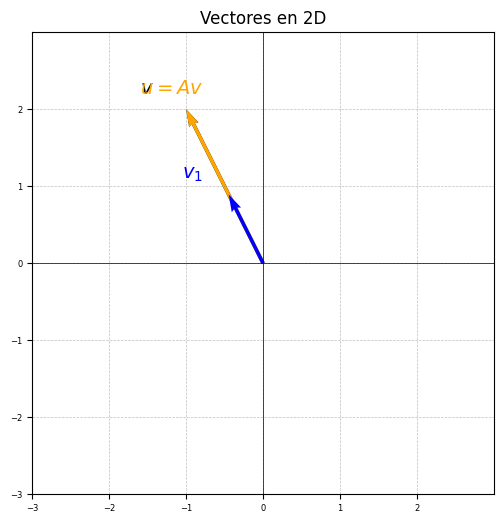

In [ ]:
# Autovalores y autovectores con numpy

A = np.array([[3, 1],
              [2, 2]])

# Calcular autovalores y autovectores
autovalores, autovectores = np.linalg.eig(A)

v_np = autovectores[:,1]
v = np.array([[-1],[2]])
u = A.dot(v)

print("Matriz A:")
print(A)
print("\nAutovalores:")
print(autovalores)
print("\nAutovectores:")
print(autovectores)
print("\nVector transformado:")
print(w)
print("\nVector transformado dividido:")
print(u/autovalores[0])

plot_vectors([v,u , v_np], [f"$v$", f"$u = Av$", f"$v_1$"], ["black", "Orange", "blue"], 3, 3)

In [ ]:
# Descomposición de una matriz a partir de sus autovalores y autovectores

# Definir la matriz
A = np.array([[2, 1, 0],
              [1, 3, 1],
              [0, 1, 2]])

# Calcular autovalores y autovectores
autovalores, autovectores = np.linalg.eig(A)

# Crear matrices U y D
U = autovectores
D = np.diag(autovalores)

# Verificar que A = UDU^{-1}
A_reconstruida = U @ D @ np.linalg.inv(U)

# Mostrar resultados
print("Matriz Original:")
print(A)

print("\nMatriz de Autovectores U:")
print(U)

print("\nMatriz Diagonal de Autovalores D:")
print(D)

print("\nMatriz Reconstruida UDU^-1:")
print(A_reconstruida)


Matriz Original:
[[2 1 0]
 [1 3 1]
 [0 1 2]]

Matriz de Autovectores U:
[[-4.08248290e-01  7.07106781e-01  5.77350269e-01]
 [-8.16496581e-01 -3.45742585e-16 -5.77350269e-01]
 [-4.08248290e-01 -7.07106781e-01  5.77350269e-01]]

Matriz Diagonal de Autovalores D:
[[4. 0. 0.]
 [0. 2. 0.]
 [0. 0. 1.]]

Matriz Reconstruida UDU^-1:
[[2.00000000e+00 1.00000000e+00 3.34106299e-16]
 [1.00000000e+00 3.00000000e+00 1.00000000e+00]
 [2.27686080e-16 1.00000000e+00 2.00000000e+00]]


# **Créditos**
---

**Docente:** Nicolás Castillo Ojeda

**Universidad Pedagógica y Tecnológica de Colombia** - *Diplomado en Data Science - Cohorte I - 2024*


---